# A-E vs A-P

### Load data

In [1]:
from src.preprocessing import *
from src.benchmarks import *
from src.models import *
 
print('...loading the dataset from mongodb...')
X_0, y_0 = load_data('bio_dataset', 'GM12878', 'A-E', 'A-P', 'epigenomic')
X_1, y_1 = load_data('bio_dataset', 'HelaS3', 'A-E', 'A-P', 'epigenomic')
X_2, y_2 = load_data('bio_dataset', 'HepG2', 'A-E', 'A-P', 'epigenomic')
X_3, y_3 = load_data('bio_dataset', 'K562', 'A-E', 'A-P', 'epigenomic')
print('...dataset loaded...')

Using TensorFlow backend.
W0627 16:36:16.831224 140296727996032 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
/usr/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


...loading the dataset from mongodb...
...dataset loaded...


### Split data between training, validation and test set

In [2]:
X_train = [[] for i in range(4)]
X_test = [[] for i in range(4)]
X_val = [[] for i in range(4)]
y_train = [[] for i in range(4)]
y_test = [[] for i in range(4)]
y_val = [[] for i in range(4)]

print('...splitting between training-set and test-set...')
print()

X_train[0], X_test[0], y_train[0], y_test[0] = splitting(X_0, y_0, 0.2)
X_train[0], X_val[0], y_train[0], y_val[0] = splitting(X_train[0], y_train[0], 0.2)

print(f'[GM12878] # samples in training-set: {len(X_train[0])}')
print(f'[GM12878] # samples in test-set: {len(X_test[0])}')
print(f'[GM12878] # samples in validation-set: {len(X_val[0])}')
print()

X_train[1], X_test[1], y_train[1], y_test[1] = splitting(X_1, y_1, 0.2)
X_train[1], X_val[1], y_train[1], y_val[1] = splitting(X_train[1], y_train[1], 0.2)

print(f'[HelaS3] # samples in training-set: {len(X_train[1])}')
print(f'[HelaS3] # samples in test-set: {len(X_test[1])}')
print(f'[HelaS3] # samples in validation-set: {len(X_val[1])}')
print()

X_train[2], X_test[2], y_train[2], y_test[2] = splitting(X_2, y_2, 0.2)
X_train[2], X_val[2], y_train[2], y_val[2] = splitting(X_train[2], y_train[2], 0.2)

print(f'[HepG2] # samples in training-set: {len(X_train[2])}')
print(f'[HepG2] # samples in test-set: {len(X_test[2])}')
print(f'[HepG2] # samples in validation-set: {len(X_val[2])}')
print()

X_train[3], X_test[3], y_train[3], y_test[3] = splitting(X_3, y_3, 0.2)
X_train[3], X_val[3], y_train[3], y_val[3] = splitting(X_train[3], y_train[3], 0.2)

print(f'[K562] # samples in training-set: {len(X_train[3])}')
print(f'[K562] # samples in test-set: {len(X_test[3])}')
print(f'[K562] # samples in validation-set: {len(X_val[3])}')

...splitting between training-set and test-set...

[GM12878] # samples in training-set: 8764
[GM12878] # samples in test-set: 2739
[GM12878] # samples in validation-set: 2191

[HelaS3] # samples in training-set: 8067
[HelaS3] # samples in test-set: 2522
[HelaS3] # samples in validation-set: 2017

[HepG2] # samples in training-set: 8276
[HepG2] # samples in test-set: 2587
[HepG2] # samples in validation-set: 2069

[K562] # samples in training-set: 7020
[K562] # samples in test-set: 2194
[K562] # samples in validation-set: 1756


### Balance data

In [3]:
X_train_adasyn = [[] for i in range(4)]
y_train_adasyn = [[] for i in range(4)]
X_train_smoteenn = [[] for i in range(4)]
y_train_smoteenn = [[] for i in range(4)]


print('...oversampling training-set with ADASYN...')

X_train_adasyn[0], y_train_adasyn[0] = oversampling_adasyn(X_train[0], y_train[0])
print(f'[GM12878] # samples: {len(X_train_adasyn[0])} (enhancers: {(y_train_adasyn[0] == 1).sum()}, promoters: {(y_train_adasyn[0] == 0).sum()})')

X_train_adasyn[1], y_train_adasyn[1] = oversampling_adasyn(X_train[1], y_train[1])
print(f'[HelaS3] # samples: {len(X_train_adasyn[1])} (enhancers: {(y_train_adasyn[1] == 1).sum()}, promoters: {(y_train_adasyn[1] == 0).sum()})')

X_train_adasyn[2], y_train_adasyn[2] = oversampling_adasyn(X_train[2], y_train[2])
print(f'[HepG2] # samples: {len(X_train_adasyn[2])} (enhancers: {(y_train_adasyn[2] == 1).sum()}, promoters: {(y_train_adasyn[2] == 0).sum()})')

X_train_adasyn[3], y_train_adasyn[3] = oversampling_adasyn(X_train[3], y_train[3])
print(f'[K562] # samples: {len(X_train_adasyn[3])} (enhancers: {(y_train_adasyn[3] == 1).sum()}, promoters: {(y_train_adasyn[3] == 0).sum()})')

print()
print('...oversampling training-set with SMOTEENN...')

X_train_smoteenn[0], y_train_smoteenn[0] = sampling_smoteenn(X_train[0], y_train[0])
print(f'[GM12878] # samples: {len(X_train_smoteenn[0])} (enhancers: {(y_train_smoteenn[0] == 1).sum()}, promoters: {(y_train_smoteenn[0] == 0).sum()})')

X_train_smoteenn[1], y_train_smoteenn[1] = sampling_smoteenn(X_train[1], y_train[1])
print(f'[HelaS3] # samples: {len(X_train_smoteenn[1])} (enhancers: {(y_train_smoteenn[1] == 1).sum()}, promoters: {(y_train_smoteenn[1] == 0).sum()})')

X_train_smoteenn[2], y_train_smoteenn[2] = sampling_smoteenn(X_train[2], y_train[2])
print(f'[HepG2] # samples: {len(X_train_smoteenn[2])} (enhancers: {(y_train_smoteenn[2] == 1).sum()}, promoters: {(y_train_smoteenn[2] == 0).sum()})')

X_train_smoteenn[3], y_train_smoteenn[3] = sampling_smoteenn(X_train[3], y_train[3])
print(f'[K562] # samples: {len(X_train_smoteenn[3])} (enhancers: {(y_train_smoteenn[3] == 1).sum()}, promoters: {(y_train_smoteenn[3] == 0).sum()})')

...oversampling training-set with ADASYN...
[GM12878] # samples: 13778 (enhancers: 6870, promoters: 6908)
[HelaS3] # samples: 13736 (enhancers: 6889, promoters: 6847)
[HepG2] # samples: 14561 (enhancers: 7247, promoters: 7314)
[K562] # samples: 12900 (enhancers: 6454, promoters: 6446)

...oversampling training-set with SMOTEENN...
[GM12878] # samples: 12528 (enhancers: 6733, promoters: 5795)
[HelaS3] # samples: 12331 (enhancers: 6722, promoters: 5609)
[HepG2] # samples: 13499 (enhancers: 7297, promoters: 6202)
[K562] # samples: 11745 (enhancers: 6442, promoters: 5303)


## Benchmarks with the first MLP (2 layers, (256, 256))

In [4]:
import matplotlib.pyplot as plt

history = [[] for i in range(4)]
y_pred_adasyn = [[] for i in range(4)]
y_pred_smoteenn = [[] for i in range(4)]
scores_adasyn = [[] for i in range(4)]
scores_smoteenn = [[] for i in range(4)]

inputs = [101, 74, 72, 135]
names = ["GM12878", "HelaS3", "HepG2", "K562"]

for i in range(4):
    model = dense1(inputs[i])
    history[i] = model.fit(X_train_adasyn[i], y_train_adasyn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_adasyn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_adasyn[i] = (total, one, zero)

for i in range(4):
    model = dense1(inputs[i])
    history[i] = model.fit(X_train_smoteenn[i], y_train_smoteenn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_smoteenn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_smoteenn[i] = (total, one, zero)
    
results_adasyn = [(names[i] + ' adasyn', y_test[i], y_pred_adasyn[i]) for i in range(4)]
results_smoteenn = [(names[i] + ' smoteenn', y_test[i], y_pred_smoteenn[i]) for i in range(4)]
results = results_adasyn + results_smoteenn

W0627 16:37:14.394702 140296727996032 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 16:37:14.405426 140296727996032 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 16:37:14.407240 140296727996032 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 16:37:14.418097 140296727996032 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0627 16:37:14.424154 140296727996032 deprecat

...building the mlp...


W0627 16:37:14.604684 140296727996032 deprecation.py:323] From /usr/lib/python3.7/site-packages/tensorflow/python/ops/metrics_impl.py:809: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               26112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 92,161
Trainable params: 92,161
Non-trainable params: 0
_________________________________________________________________
None
Train on 13778 samples, validate on 2191 samples
Epoch 1/150
13778/13778 [==============================] - 1s 48us/step - loss: 0.4692 - acc: 0.8182 - auc_acc: 0.8077 - f1_acc: 0.8052 - precision_acc: 0.8243 - recall_acc: 0.8098 - val_loss: 0.3496 - val_acc: 0.862

13778/13778 [==============================] - 0s 29us/step - loss: 0.1136 - acc: 0.9623 - auc_acc: 0.9763 - f1_acc: 0.9626 - precision_acc: 0.9466 - recall_acc: 0.9798 - val_loss: 0.2532 - val_acc: 0.9073 - val_auc_acc: 0.9764 - val_f1_acc: 0.8038 - val_precision_acc: 0.7127 - val_recall_acc: 0.9270
Epoch 51/150
13778/13778 [==============================] - 0s 29us/step - loss: 0.1109 - acc: 0.9633 - auc_acc: 0.9765 - f1_acc: 0.9635 - precision_acc: 0.9482 - recall_acc: 0.9801 - val_loss: 0.2343 - val_acc: 0.9165 - val_auc_acc: 0.9766 - val_f1_acc: 0.8174 - val_precision_acc: 0.7428 - val_recall_acc: 0.9127
Epoch 52/150
13778/13778 [==============================] - 0s 27us/step - loss: 0.1127 - acc: 0.9625 - auc_acc: 0.9768 - f1_acc: 0.9628 - precision_acc: 0.9464 - recall_acc: 0.9807 - val_loss: 0.2308 - val_acc: 0.9201 - val_auc_acc: 0.9769 - val_f1_acc: 0.8225 - val_precision_acc: 0.7582 - val_recall_acc: 0.9037
Epoch 53/150
13778/13778 [==============================] - 0s 27us/

13778/13778 [==============================] - 0s 29us/step - loss: 0.0662 - acc: 0.9791 - auc_acc: 0.9847 - f1_acc: 0.9790 - precision_acc: 0.9680 - recall_acc: 0.9906 - val_loss: 0.2503 - val_acc: 0.9293 - val_auc_acc: 0.9847 - val_f1_acc: 0.8382 - val_precision_acc: 0.7969 - val_recall_acc: 0.8891
Epoch 103/150
13778/13778 [==============================] - 0s 30us/step - loss: 0.0644 - acc: 0.9803 - auc_acc: 0.9848 - f1_acc: 0.9802 - precision_acc: 0.9694 - recall_acc: 0.9916 - val_loss: 0.2636 - val_acc: 0.9256 - val_auc_acc: 0.9848 - val_f1_acc: 0.8315 - val_precision_acc: 0.7829 - val_recall_acc: 0.8915
Epoch 104/150
13778/13778 [==============================] - 0s 27us/step - loss: 0.0653 - acc: 0.9798 - auc_acc: 0.9849 - f1_acc: 0.9799 - precision_acc: 0.9690 - recall_acc: 0.9914 - val_loss: 0.2550 - val_acc: 0.9288 - val_auc_acc: 0.9849 - val_f1_acc: 0.8383 - val_precision_acc: 0.7890 - val_recall_acc: 0.8980
Epoch 105/150
13778/13778 [==============================] - 0s 28

Epoch 128/150
13778/13778 [==============================] - 0s 30us/step - loss: 0.0521 - acc: 0.9841 - auc_acc: 0.9869 - f1_acc: 0.9842 - precision_acc: 0.9760 - recall_acc: 0.9928 - val_loss: 0.2700 - val_acc: 0.9302 - val_auc_acc: 0.9869 - val_f1_acc: 0.8389 - val_precision_acc: 0.7990 - val_recall_acc: 0.8873
Epoch 129/150
13778/13778 [==============================] - 0s 27us/step - loss: 0.0523 - acc: 0.9832 - auc_acc: 0.9869 - f1_acc: 0.9832 - precision_acc: 0.9737 - recall_acc: 0.9933 - val_loss: 0.2732 - val_acc: 0.9302 - val_auc_acc: 0.9870 - val_f1_acc: 0.8401 - val_precision_acc: 0.8002 - val_recall_acc: 0.8886
Epoch 130/150
13778/13778 [==============================] - 0s 31us/step - loss: 0.0527 - acc: 0.9839 - auc_acc: 0.9870 - f1_acc: 0.9839 - precision_acc: 0.9743 - recall_acc: 0.9940 - val_loss: 0.2796 - val_acc: 0.9306 - val_auc_acc: 0.9870 - val_f1_acc: 0.8381 - val_precision_acc: 0.8113 - val_recall_acc: 0.8715
Epoch 131/150
13778/13778 [=========================

13736/13736 [==============================] - 1s 51us/step - loss: 6.7518 - acc: 0.5104 - auc_acc: 0.5081 - f1_acc: 0.3797 - precision_acc: 0.4137 - recall_acc: 0.5193 - val_loss: 12.5804 - val_acc: 0.1785 - val_auc_acc: 0.4810 - val_f1_acc: 0.2487 - val_precision_acc: 0.1432 - val_recall_acc: 0.9968
Epoch 2/150
13736/13736 [==============================] - 0s 30us/step - loss: 6.8939 - acc: 0.5188 - auc_acc: 0.4722 - f1_acc: 0.3270 - precision_acc: 0.5704 - recall_acc: 0.4033 - val_loss: 1.7624 - val_acc: 0.8691 - val_auc_acc: 0.4958 - val_f1_acc: 0.1602 - val_precision_acc: 0.4939 - val_recall_acc: 0.0982
Epoch 3/150
13736/13736 [==============================] - 0s 30us/step - loss: 6.0669 - acc: 0.5740 - auc_acc: 0.5123 - f1_acc: 0.3532 - precision_acc: 0.8116 - recall_acc: 0.3027 - val_loss: 6.1662 - val_acc: 0.3912 - val_auc_acc: 0.5167 - val_f1_acc: 0.3021 - val_precision_acc: 0.1807 - val_recall_acc: 0.9698
Epoch 4/150
13736/13736 [==============================] - 0s 29us/st

13736/13736 [==============================] - 0s 34us/step - loss: 2.0790 - acc: 0.8169 - auc_acc: 0.7119 - f1_acc: 0.8039 - precision_acc: 0.8668 - recall_acc: 0.7824 - val_loss: 0.4943 - val_acc: 0.9425 - val_auc_acc: 0.7131 - val_f1_acc: 0.7853 - val_precision_acc: 0.7685 - val_recall_acc: 0.8186
Epoch 54/150
13736/13736 [==============================] - 0s 28us/step - loss: 2.2752 - acc: 0.8109 - auc_acc: 0.7141 - f1_acc: 0.8026 - precision_acc: 0.8649 - recall_acc: 0.7804 - val_loss: 0.6317 - val_acc: 0.9276 - val_auc_acc: 0.7151 - val_f1_acc: 0.7348 - val_precision_acc: 0.7226 - val_recall_acc: 0.7649
Epoch 55/150
13736/13736 [==============================] - 0s 30us/step - loss: 2.8962 - acc: 0.7777 - auc_acc: 0.7157 - f1_acc: 0.7625 - precision_acc: 0.8455 - recall_acc: 0.7511 - val_loss: 0.7077 - val_acc: 0.9375 - val_auc_acc: 0.7166 - val_f1_acc: 0.7446 - val_precision_acc: 0.8170 - val_recall_acc: 0.6993
Epoch 56/150
13736/13736 [==============================] - 0s 30us/

13736/13736 [==============================] - 0s 33us/step - loss: 3.1392 - acc: 0.7928 - auc_acc: 0.7296 - f1_acc: 0.7817 - precision_acc: 0.8578 - recall_acc: 0.7594 - val_loss: 0.9365 - val_acc: 0.9271 - val_auc_acc: 0.7302 - val_f1_acc: 0.7531 - val_precision_acc: 0.6877 - val_recall_acc: 0.8531
Epoch 80/150
13736/13736 [==============================] - 0s 31us/step - loss: 2.8682 - acc: 0.8096 - auc_acc: 0.7308 - f1_acc: 0.7964 - precision_acc: 0.8709 - recall_acc: 0.7657 - val_loss: 0.9225 - val_acc: 0.9341 - val_auc_acc: 0.7314 - val_f1_acc: 0.7559 - val_precision_acc: 0.7446 - val_recall_acc: 0.7833
Epoch 81/150
13736/13736 [==============================] - 0s 34us/step - loss: 3.4983 - acc: 0.7703 - auc_acc: 0.7317 - f1_acc: 0.7676 - precision_acc: 0.8293 - recall_acc: 0.7693 - val_loss: 0.9600 - val_acc: 0.9321 - val_auc_acc: 0.7322 - val_f1_acc: 0.7697 - val_precision_acc: 0.7033 - val_recall_acc: 0.8707
Epoch 82/150
13736/13736 [==============================] - 0s 32us/

13736/13736 [==============================] - 0s 32us/step - loss: 0.2905 - acc: 0.9038 - auc_acc: 0.7407 - f1_acc: 0.9043 - precision_acc: 0.8999 - recall_acc: 0.9120 - val_loss: 0.6426 - val_acc: 0.6475 - val_auc_acc: 0.7411 - val_f1_acc: 0.4310 - val_precision_acc: 0.2789 - val_recall_acc: 0.9894
Epoch 106/150
13736/13736 [==============================] - 0s 33us/step - loss: 0.2952 - acc: 0.9030 - auc_acc: 0.7415 - f1_acc: 0.9023 - precision_acc: 0.9004 - recall_acc: 0.9084 - val_loss: 0.2546 - val_acc: 0.9182 - val_auc_acc: 0.7420 - val_f1_acc: 0.7546 - val_precision_acc: 0.6367 - val_recall_acc: 0.9514
Epoch 107/150
13736/13736 [==============================] - 0s 33us/step - loss: 0.2763 - acc: 0.9073 - auc_acc: 0.7425 - f1_acc: 0.9072 - precision_acc: 0.9038 - recall_acc: 0.9140 - val_loss: 0.3437 - val_acc: 0.8651 - val_auc_acc: 0.7429 - val_f1_acc: 0.6591 - val_precision_acc: 0.5079 - val_recall_acc: 0.9684
Epoch 108/150
13736/13736 [==============================] - 0s 31

Epoch 131/150
13736/13736 [==============================] - 0s 27us/step - loss: 0.2425 - acc: 0.9169 - auc_acc: 0.7648 - f1_acc: 0.9170 - precision_acc: 0.9130 - recall_acc: 0.9231 - val_loss: 0.2758 - val_acc: 0.9078 - val_auc_acc: 0.7653 - val_f1_acc: 0.7347 - val_precision_acc: 0.6020 - val_recall_acc: 0.9649
Epoch 132/150
13736/13736 [==============================] - 0s 31us/step - loss: 0.2389 - acc: 0.9141 - auc_acc: 0.7657 - f1_acc: 0.9146 - precision_acc: 0.9095 - recall_acc: 0.9220 - val_loss: 0.2325 - val_acc: 0.9192 - val_auc_acc: 0.7662 - val_f1_acc: 0.7506 - val_precision_acc: 0.6407 - val_recall_acc: 0.9277
Epoch 133/150
13736/13736 [==============================] - 0s 29us/step - loss: 0.2367 - acc: 0.9147 - auc_acc: 0.7667 - f1_acc: 0.9153 - precision_acc: 0.9078 - recall_acc: 0.9253 - val_loss: 0.2529 - val_acc: 0.9147 - val_auc_acc: 0.7671 - val_f1_acc: 0.7431 - val_precision_acc: 0.6242 - val_recall_acc: 0.9390
Epoch 134/150
13736/13736 [=========================

Epoch 4/150
14561/14561 [==============================] - 0s 27us/step - loss: 0.2574 - acc: 0.9039 - auc_acc: 0.9333 - f1_acc: 0.9046 - precision_acc: 0.8892 - recall_acc: 0.9222 - val_loss: 0.2748 - val_acc: 0.8840 - val_auc_acc: 0.9365 - val_f1_acc: 0.6267 - val_precision_acc: 0.4718 - val_recall_acc: 0.9504
Epoch 5/150
14561/14561 [==============================] - 0s 27us/step - loss: 0.2476 - acc: 0.9071 - auc_acc: 0.9390 - f1_acc: 0.9077 - precision_acc: 0.8919 - recall_acc: 0.9261 - val_loss: 0.2214 - val_acc: 0.9058 - val_auc_acc: 0.9414 - val_f1_acc: 0.6668 - val_precision_acc: 0.5280 - val_recall_acc: 0.9200
Epoch 6/150
14561/14561 [==============================] - 0s 28us/step - loss: 0.2356 - acc: 0.9108 - auc_acc: 0.9434 - f1_acc: 0.9116 - precision_acc: 0.8935 - recall_acc: 0.9328 - val_loss: 0.2565 - val_acc: 0.8913 - val_auc_acc: 0.9451 - val_f1_acc: 0.6391 - val_precision_acc: 0.4889 - val_recall_acc: 0.9376
Epoch 7/150
14561/14561 [==============================] -

14561/14561 [==============================] - 0s 31us/step - loss: 0.1446 - acc: 0.9498 - auc_acc: 0.9705 - f1_acc: 0.9505 - precision_acc: 0.9266 - recall_acc: 0.9768 - val_loss: 0.1945 - val_acc: 0.9174 - val_auc_acc: 0.9707 - val_f1_acc: 0.6961 - val_precision_acc: 0.5664 - val_recall_acc: 0.9139
Epoch 31/150
14561/14561 [==============================] - 0s 30us/step - loss: 0.1459 - acc: 0.9488 - auc_acc: 0.9710 - f1_acc: 0.9495 - precision_acc: 0.9268 - recall_acc: 0.9742 - val_loss: 0.1950 - val_acc: 0.9232 - val_auc_acc: 0.9712 - val_f1_acc: 0.7128 - val_precision_acc: 0.5896 - val_recall_acc: 0.9141
Epoch 32/150
14561/14561 [==============================] - 0s 30us/step - loss: 0.1407 - acc: 0.9515 - auc_acc: 0.9714 - f1_acc: 0.9524 - precision_acc: 0.9289 - recall_acc: 0.9777 - val_loss: 0.1766 - val_acc: 0.9275 - val_auc_acc: 0.9716 - val_f1_acc: 0.7218 - val_precision_acc: 0.6054 - val_recall_acc: 0.9038
Epoch 33/150
14561/14561 [==============================] - 0s 30us/

14561/14561 [==============================] - 0s 31us/step - loss: 0.0811 - acc: 0.9739 - auc_acc: 0.9839 - f1_acc: 0.9740 - precision_acc: 0.9587 - recall_acc: 0.9904 - val_loss: 0.1670 - val_acc: 0.9502 - val_auc_acc: 0.9839 - val_f1_acc: 0.7857 - val_precision_acc: 0.7301 - val_recall_acc: 0.8682
Epoch 83/150
14561/14561 [==============================] - 0s 30us/step - loss: 0.0808 - acc: 0.9749 - auc_acc: 0.9840 - f1_acc: 0.9749 - precision_acc: 0.9604 - recall_acc: 0.9903 - val_loss: 0.1749 - val_acc: 0.9488 - val_auc_acc: 0.9841 - val_f1_acc: 0.7811 - val_precision_acc: 0.7175 - val_recall_acc: 0.8748
Epoch 84/150
14561/14561 [==============================] - 0s 28us/step - loss: 0.0801 - acc: 0.9743 - auc_acc: 0.9841 - f1_acc: 0.9743 - precision_acc: 0.9586 - recall_acc: 0.9910 - val_loss: 0.1669 - val_acc: 0.9512 - val_auc_acc: 0.9842 - val_f1_acc: 0.7867 - val_precision_acc: 0.7320 - val_recall_acc: 0.8679
Epoch 85/150
14561/14561 [==============================] - 0s 32us/

14561/14561 [==============================] - 0s 33us/step - loss: 0.0656 - acc: 0.9801 - auc_acc: 0.9869 - f1_acc: 0.9800 - precision_acc: 0.9670 - recall_acc: 0.9937 - val_loss: 0.1766 - val_acc: 0.9546 - val_auc_acc: 0.9870 - val_f1_acc: 0.7995 - val_precision_acc: 0.7437 - val_recall_acc: 0.8795
Epoch 109/150
14561/14561 [==============================] - 0s 32us/step - loss: 0.0648 - acc: 0.9790 - auc_acc: 0.9870 - f1_acc: 0.9790 - precision_acc: 0.9660 - recall_acc: 0.9927 - val_loss: 0.1872 - val_acc: 0.9483 - val_auc_acc: 0.9870 - val_f1_acc: 0.7799 - val_precision_acc: 0.7076 - val_recall_acc: 0.8831
Epoch 110/150
14561/14561 [==============================] - 0s 32us/step - loss: 0.0652 - acc: 0.9795 - auc_acc: 0.9871 - f1_acc: 0.9794 - precision_acc: 0.9657 - recall_acc: 0.9937 - val_loss: 0.1798 - val_acc: 0.9555 - val_auc_acc: 0.9871 - val_f1_acc: 0.8016 - val_precision_acc: 0.7571 - val_recall_acc: 0.8669
Epoch 111/150
14561/14561 [==============================] - 0s 33

Epoch 134/150
14561/14561 [==============================] - 0s 27us/step - loss: 0.0518 - acc: 0.9841 - auc_acc: 0.9890 - f1_acc: 0.9840 - precision_acc: 0.9737 - recall_acc: 0.9949 - val_loss: 0.1764 - val_acc: 0.9575 - val_auc_acc: 0.9891 - val_f1_acc: 0.8000 - val_precision_acc: 0.7853 - val_recall_acc: 0.8327
Epoch 135/150
14561/14561 [==============================] - 0s 25us/step - loss: 0.0515 - acc: 0.9840 - auc_acc: 0.9891 - f1_acc: 0.9841 - precision_acc: 0.9751 - recall_acc: 0.9936 - val_loss: 0.1823 - val_acc: 0.9565 - val_auc_acc: 0.9891 - val_f1_acc: 0.8028 - val_precision_acc: 0.7653 - val_recall_acc: 0.8609
Epoch 136/150
14561/14561 [==============================] - 0s 28us/step - loss: 0.0500 - acc: 0.9844 - auc_acc: 0.9892 - f1_acc: 0.9844 - precision_acc: 0.9744 - recall_acc: 0.9948 - val_loss: 0.1784 - val_acc: 0.9580 - val_auc_acc: 0.9892 - val_f1_acc: 0.8114 - val_precision_acc: 0.7849 - val_recall_acc: 0.8599
Epoch 137/150
14561/14561 [=========================

Epoch 7/150
12900/12900 [==============================] - 0s 34us/step - loss: 0.2178 - acc: 0.9195 - auc_acc: 0.9324 - f1_acc: 0.9203 - precision_acc: 0.9070 - recall_acc: 0.9360 - val_loss: 0.2469 - val_acc: 0.9021 - val_auc_acc: 0.9351 - val_f1_acc: 0.5996 - val_precision_acc: 0.4567 - val_recall_acc: 0.9099
Epoch 8/150
12900/12900 [==============================] - 0s 34us/step - loss: 0.2054 - acc: 0.9250 - auc_acc: 0.9375 - f1_acc: 0.9253 - precision_acc: 0.9144 - recall_acc: 0.9379 - val_loss: 0.2529 - val_acc: 0.9015 - val_auc_acc: 0.9397 - val_f1_acc: 0.5979 - val_precision_acc: 0.4539 - val_recall_acc: 0.9074
Epoch 9/150
12900/12900 [==============================] - 0s 34us/step - loss: 0.1997 - acc: 0.9253 - auc_acc: 0.9416 - f1_acc: 0.9258 - precision_acc: 0.9137 - recall_acc: 0.9397 - val_loss: 0.2784 - val_acc: 0.8912 - val_auc_acc: 0.9434 - val_f1_acc: 0.5758 - val_precision_acc: 0.4259 - val_recall_acc: 0.9246
Epoch 10/150
12900/12900 [==============================] 

12900/12900 [==============================] - 0s 31us/step - loss: 0.0888 - acc: 0.9732 - auc_acc: 0.9766 - f1_acc: 0.9734 - precision_acc: 0.9605 - recall_acc: 0.9871 - val_loss: 0.1722 - val_acc: 0.9448 - val_auc_acc: 0.9769 - val_f1_acc: 0.6996 - val_precision_acc: 0.6230 - val_recall_acc: 0.8169
Epoch 34/150
12900/12900 [==============================] - 0s 31us/step - loss: 0.0909 - acc: 0.9708 - auc_acc: 0.9772 - f1_acc: 0.9710 - precision_acc: 0.9567 - recall_acc: 0.9862 - val_loss: 0.1821 - val_acc: 0.9402 - val_auc_acc: 0.9774 - val_f1_acc: 0.6845 - val_precision_acc: 0.5980 - val_recall_acc: 0.8246
Epoch 35/150
12900/12900 [==============================] - 0s 29us/step - loss: 0.0880 - acc: 0.9731 - auc_acc: 0.9777 - f1_acc: 0.9736 - precision_acc: 0.9591 - recall_acc: 0.9889 - val_loss: 0.1748 - val_acc: 0.9425 - val_auc_acc: 0.9780 - val_f1_acc: 0.6946 - val_precision_acc: 0.6075 - val_recall_acc: 0.8296
Epoch 36/150
12900/12900 [==============================] - 0s 31us/

12900/12900 [==============================] - 0s 31us/step - loss: 0.0346 - acc: 0.9895 - auc_acc: 0.9902 - f1_acc: 0.9894 - precision_acc: 0.9833 - recall_acc: 0.9957 - val_loss: 0.1942 - val_acc: 0.9476 - val_auc_acc: 0.9903 - val_f1_acc: 0.6979 - val_precision_acc: 0.6661 - val_recall_acc: 0.7524
Epoch 86/150
12900/12900 [==============================] - 0s 31us/step - loss: 0.0327 - acc: 0.9896 - auc_acc: 0.9903 - f1_acc: 0.9896 - precision_acc: 0.9835 - recall_acc: 0.9958 - val_loss: 0.1908 - val_acc: 0.9516 - val_auc_acc: 0.9904 - val_f1_acc: 0.7134 - val_precision_acc: 0.6898 - val_recall_acc: 0.7616
Epoch 87/150
12900/12900 [==============================] - 0s 32us/step - loss: 0.0329 - acc: 0.9905 - auc_acc: 0.9904 - f1_acc: 0.9907 - precision_acc: 0.9850 - recall_acc: 0.9965 - val_loss: 0.2026 - val_acc: 0.9465 - val_auc_acc: 0.9905 - val_f1_acc: 0.6970 - val_precision_acc: 0.6489 - val_recall_acc: 0.7813
Epoch 88/150
12900/12900 [==============================] - 0s 34us/

12900/12900 [==============================] - 0s 36us/step - loss: 0.0242 - acc: 0.9933 - auc_acc: 0.9925 - f1_acc: 0.9933 - precision_acc: 0.9887 - recall_acc: 0.9980 - val_loss: 0.2073 - val_acc: 0.9556 - val_auc_acc: 0.9925 - val_f1_acc: 0.7228 - val_precision_acc: 0.7467 - val_recall_acc: 0.7144
Epoch 112/150
12900/12900 [==============================] - 0s 35us/step - loss: 0.0250 - acc: 0.9919 - auc_acc: 0.9925 - f1_acc: 0.9921 - precision_acc: 0.9881 - recall_acc: 0.9962 - val_loss: 0.2044 - val_acc: 0.9533 - val_auc_acc: 0.9926 - val_f1_acc: 0.7211 - val_precision_acc: 0.7033 - val_recall_acc: 0.7543
Epoch 113/150
12900/12900 [==============================] - 0s 33us/step - loss: 0.0234 - acc: 0.9931 - auc_acc: 0.9926 - f1_acc: 0.9931 - precision_acc: 0.9892 - recall_acc: 0.9972 - val_loss: 0.2030 - val_acc: 0.9579 - val_auc_acc: 0.9926 - val_f1_acc: 0.7408 - val_precision_acc: 0.7425 - val_recall_acc: 0.7543
Epoch 114/150
12900/12900 [==============================] - 0s 32

Epoch 137/150
12900/12900 [==============================] - 0s 33us/step - loss: 0.0185 - acc: 0.9953 - auc_acc: 0.9938 - f1_acc: 0.9952 - precision_acc: 0.9918 - recall_acc: 0.9987 - val_loss: 0.2129 - val_acc: 0.9562 - val_auc_acc: 0.9938 - val_f1_acc: 0.7346 - val_precision_acc: 0.7342 - val_recall_acc: 0.7522
Epoch 138/150
12900/12900 [==============================] - 0s 31us/step - loss: 0.0191 - acc: 0.9945 - auc_acc: 0.9939 - f1_acc: 0.9945 - precision_acc: 0.9914 - recall_acc: 0.9976 - val_loss: 0.2128 - val_acc: 0.9550 - val_auc_acc: 0.9939 - val_f1_acc: 0.7273 - val_precision_acc: 0.7297 - val_recall_acc: 0.7388
Epoch 139/150
12900/12900 [==============================] - 0s 32us/step - loss: 0.0183 - acc: 0.9947 - auc_acc: 0.9939 - f1_acc: 0.9947 - precision_acc: 0.9908 - recall_acc: 0.9988 - val_loss: 0.2112 - val_acc: 0.9539 - val_auc_acc: 0.9939 - val_f1_acc: 0.7201 - val_precision_acc: 0.7119 - val_recall_acc: 0.7444
Epoch 140/150
12900/12900 [=========================

12528/12528 [==============================] - 0s 30us/step - loss: 0.0763 - acc: 0.9743 - auc_acc: 0.9852 - f1_acc: 0.9757 - precision_acc: 0.9793 - recall_acc: 0.9726 - val_loss: 0.3773 - val_acc: 0.8969 - val_auc_acc: 0.9854 - val_f1_acc: 0.7852 - val_precision_acc: 0.6962 - val_recall_acc: 0.9067
Epoch 11/150
12528/12528 [==============================] - 0s 33us/step - loss: 0.0741 - acc: 0.9745 - auc_acc: 0.9856 - f1_acc: 0.9761 - precision_acc: 0.9805 - recall_acc: 0.9720 - val_loss: 0.3843 - val_acc: 0.9000 - val_auc_acc: 0.9859 - val_f1_acc: 0.7882 - val_precision_acc: 0.7053 - val_recall_acc: 0.8992
Epoch 12/150
12528/12528 [==============================] - 0s 34us/step - loss: 0.0712 - acc: 0.9755 - auc_acc: 0.9861 - f1_acc: 0.9770 - precision_acc: 0.9785 - recall_acc: 0.9759 - val_loss: 0.4004 - val_acc: 0.8959 - val_auc_acc: 0.9862 - val_f1_acc: 0.7826 - val_precision_acc: 0.6931 - val_recall_acc: 0.9046
Epoch 13/150
12528/12528 [==============================] - 0s 30us/

12528/12528 [==============================] - 0s 28us/step - loss: 0.0276 - acc: 0.9904 - auc_acc: 0.9910 - f1_acc: 0.9912 - precision_acc: 0.9905 - recall_acc: 0.9920 - val_loss: 0.4761 - val_acc: 0.9023 - val_auc_acc: 0.9910 - val_f1_acc: 0.7921 - val_precision_acc: 0.7114 - val_recall_acc: 0.8990
Epoch 63/150
12528/12528 [==============================] - 0s 30us/step - loss: 0.0280 - acc: 0.9906 - auc_acc: 0.9910 - f1_acc: 0.9911 - precision_acc: 0.9910 - recall_acc: 0.9915 - val_loss: 0.4836 - val_acc: 0.9051 - val_auc_acc: 0.9910 - val_f1_acc: 0.7977 - val_precision_acc: 0.7167 - val_recall_acc: 0.9050
Epoch 64/150
12528/12528 [==============================] - 0s 31us/step - loss: 0.0260 - acc: 0.9913 - auc_acc: 0.9910 - f1_acc: 0.9917 - precision_acc: 0.9916 - recall_acc: 0.9919 - val_loss: 0.5004 - val_acc: 0.8982 - val_auc_acc: 0.9910 - val_f1_acc: 0.7872 - val_precision_acc: 0.6973 - val_recall_acc: 0.9104
Epoch 65/150
12528/12528 [==============================] - 0s 31us/

12528/12528 [==============================] - 0s 31us/step - loss: 0.0139 - acc: 0.9961 - auc_acc: 0.9917 - f1_acc: 0.9964 - precision_acc: 0.9958 - recall_acc: 0.9970 - val_loss: 0.5821 - val_acc: 0.9046 - val_auc_acc: 0.9917 - val_f1_acc: 0.7970 - val_precision_acc: 0.7151 - val_recall_acc: 0.9067
Epoch 115/150
12528/12528 [==============================] - 0s 33us/step - loss: 0.0144 - acc: 0.9958 - auc_acc: 0.9917 - f1_acc: 0.9960 - precision_acc: 0.9954 - recall_acc: 0.9968 - val_loss: 0.5834 - val_acc: 0.9055 - val_auc_acc: 0.9917 - val_f1_acc: 0.7987 - val_precision_acc: 0.7162 - val_recall_acc: 0.9085
Epoch 116/150
12528/12528 [==============================] - 0s 30us/step - loss: 0.0139 - acc: 0.9961 - auc_acc: 0.9917 - f1_acc: 0.9963 - precision_acc: 0.9956 - recall_acc: 0.9970 - val_loss: 0.5719 - val_acc: 0.9069 - val_auc_acc: 0.9917 - val_f1_acc: 0.8005 - val_precision_acc: 0.7202 - val_recall_acc: 0.9067
Epoch 117/150
12528/12528 [==============================] - 0s 30

Epoch 140/150
12528/12528 [==============================] - 0s 30us/step - loss: 0.0109 - acc: 0.9974 - auc_acc: 0.9918 - f1_acc: 0.9975 - precision_acc: 0.9975 - recall_acc: 0.9976 - val_loss: 0.6204 - val_acc: 0.9042 - val_auc_acc: 0.9918 - val_f1_acc: 0.7961 - val_precision_acc: 0.7137 - val_recall_acc: 0.9067
Epoch 141/150
12528/12528 [==============================] - 0s 30us/step - loss: 0.0119 - acc: 0.9966 - auc_acc: 0.9918 - f1_acc: 0.9968 - precision_acc: 0.9959 - recall_acc: 0.9978 - val_loss: 0.6049 - val_acc: 0.9064 - val_auc_acc: 0.9918 - val_f1_acc: 0.7994 - val_precision_acc: 0.7199 - val_recall_acc: 0.9039
Epoch 142/150
12528/12528 [==============================] - 0s 30us/step - loss: 0.0115 - acc: 0.9967 - auc_acc: 0.9918 - f1_acc: 0.9970 - precision_acc: 0.9971 - recall_acc: 0.9970 - val_loss: 0.6328 - val_acc: 0.9023 - val_auc_acc: 0.9918 - val_f1_acc: 0.7931 - val_precision_acc: 0.7090 - val_recall_acc: 0.9067
Epoch 143/150
12528/12528 [=========================

12331/12331 [==============================] - 0s 29us/step - loss: 2.3459 - acc: 0.8421 - auc_acc: 0.7773 - f1_acc: 0.8325 - precision_acc: 0.9465 - recall_acc: 0.7707 - val_loss: 1.0617 - val_acc: 0.9261 - val_auc_acc: 0.7804 - val_f1_acc: 0.6851 - val_precision_acc: 0.7937 - val_recall_acc: 0.6231
Epoch 14/150
12331/12331 [==============================] - 0s 29us/step - loss: 2.8045 - acc: 0.8145 - auc_acc: 0.7827 - f1_acc: 0.8080 - precision_acc: 0.9346 - recall_acc: 0.7477 - val_loss: 1.7063 - val_acc: 0.8810 - val_auc_acc: 0.7841 - val_f1_acc: 0.6691 - val_precision_acc: 0.5466 - val_recall_acc: 0.8967
Epoch 15/150
12331/12331 [==============================] - 0s 29us/step - loss: 2.4423 - acc: 0.8391 - auc_acc: 0.7862 - f1_acc: 0.8374 - precision_acc: 0.9454 - recall_acc: 0.7720 - val_loss: 2.9337 - val_acc: 0.7992 - val_auc_acc: 0.7881 - val_f1_acc: 0.5481 - val_precision_acc: 0.3964 - val_recall_acc: 0.9190
Epoch 16/150
12331/12331 [==============================] - 0s 32us/

12331/12331 [==============================] - 0s 27us/step - loss: 2.1903 - acc: 0.8554 - auc_acc: 0.8643 - f1_acc: 0.8561 - precision_acc: 0.9461 - recall_acc: 0.8059 - val_loss: 1.0837 - val_acc: 0.9048 - val_auc_acc: 0.8642 - val_f1_acc: 0.6487 - val_precision_acc: 0.6558 - val_recall_acc: 0.6613
Epoch 66/150
12331/12331 [==============================] - 0s 29us/step - loss: 1.4051 - acc: 0.9042 - auc_acc: 0.8645 - f1_acc: 0.9073 - precision_acc: 0.9608 - recall_acc: 0.8661 - val_loss: 1.0299 - val_acc: 0.9222 - val_auc_acc: 0.8649 - val_f1_acc: 0.7464 - val_precision_acc: 0.6695 - val_recall_acc: 0.8656
Epoch 67/150
12331/12331 [==============================] - 0s 29us/step - loss: 2.0374 - acc: 0.8595 - auc_acc: 0.8647 - f1_acc: 0.8873 - precision_acc: 0.8793 - recall_acc: 0.9226 - val_loss: 0.8578 - val_acc: 0.9400 - val_auc_acc: 0.8651 - val_f1_acc: 0.7593 - val_precision_acc: 0.8234 - val_recall_acc: 0.7182
Epoch 68/150
12331/12331 [==============================] - 0s 29us/

Epoch 117/150
12331/12331 [==============================] - 0s 31us/step - loss: 0.7132 - acc: 0.9272 - auc_acc: 0.8832 - f1_acc: 0.9334 - precision_acc: 0.9462 - recall_acc: 0.9265 - val_loss: 2.2340 - val_acc: 0.6767 - val_auc_acc: 0.8834 - val_f1_acc: 0.4519 - val_precision_acc: 0.2975 - val_recall_acc: 0.9833
Epoch 118/150
12331/12331 [==============================] - 0s 30us/step - loss: 0.8240 - acc: 0.9154 - auc_acc: 0.8835 - f1_acc: 0.9219 - precision_acc: 0.9459 - recall_acc: 0.9078 - val_loss: 0.7128 - val_acc: 0.9420 - val_auc_acc: 0.8837 - val_f1_acc: 0.7711 - val_precision_acc: 0.8198 - val_recall_acc: 0.7414
Epoch 119/150
12331/12331 [==============================] - 0s 28us/step - loss: 0.8182 - acc: 0.9235 - auc_acc: 0.8839 - f1_acc: 0.9268 - precision_acc: 0.9642 - recall_acc: 0.8971 - val_loss: 0.5820 - val_acc: 0.9400 - val_auc_acc: 0.8841 - val_f1_acc: 0.7915 - val_precision_acc: 0.7324 - val_recall_acc: 0.8764
Epoch 120/150
12331/12331 [=========================

Epoch 143/150
12331/12331 [==============================] - 0s 31us/step - loss: 0.1166 - acc: 0.9624 - auc_acc: 0.8938 - f1_acc: 0.9651 - precision_acc: 0.9737 - recall_acc: 0.9573 - val_loss: 0.4018 - val_acc: 0.9227 - val_auc_acc: 0.8940 - val_f1_acc: 0.7613 - val_precision_acc: 0.6464 - val_recall_acc: 0.9453
Epoch 144/150
12331/12331 [==============================] - 0s 32us/step - loss: 0.1195 - acc: 0.9599 - auc_acc: 0.8942 - f1_acc: 0.9626 - precision_acc: 0.9709 - recall_acc: 0.9554 - val_loss: 0.3822 - val_acc: 0.9266 - val_auc_acc: 0.8944 - val_f1_acc: 0.7684 - val_precision_acc: 0.6623 - val_recall_acc: 0.9330
Epoch 145/150
12331/12331 [==============================] - 0s 31us/step - loss: 0.1170 - acc: 0.9604 - auc_acc: 0.8947 - f1_acc: 0.9632 - precision_acc: 0.9715 - recall_acc: 0.9557 - val_loss: 0.4121 - val_acc: 0.9162 - val_auc_acc: 0.8949 - val_f1_acc: 0.7470 - val_precision_acc: 0.6273 - val_recall_acc: 0.9429
Epoch 146/150
12331/12331 [=========================

13499/13499 [==============================] - 0s 33us/step - loss: 0.0913 - acc: 0.9664 - auc_acc: 0.9840 - f1_acc: 0.9687 - precision_acc: 0.9689 - recall_acc: 0.9690 - val_loss: 0.3271 - val_acc: 0.9024 - val_auc_acc: 0.9842 - val_f1_acc: 0.6672 - val_precision_acc: 0.5186 - val_recall_acc: 0.9510
Epoch 17/150
13499/13499 [==============================] - 0s 31us/step - loss: 0.0893 - acc: 0.9680 - auc_acc: 0.9844 - f1_acc: 0.9702 - precision_acc: 0.9691 - recall_acc: 0.9717 - val_loss: 0.3164 - val_acc: 0.9053 - val_auc_acc: 0.9846 - val_f1_acc: 0.6723 - val_precision_acc: 0.5284 - val_recall_acc: 0.9385
Epoch 18/150
13499/13499 [==============================] - 0s 32us/step - loss: 0.0833 - acc: 0.9709 - auc_acc: 0.9848 - f1_acc: 0.9731 - precision_acc: 0.9722 - recall_acc: 0.9743 - val_loss: 0.2912 - val_acc: 0.9154 - val_auc_acc: 0.9850 - val_f1_acc: 0.6926 - val_precision_acc: 0.5619 - val_recall_acc: 0.9157
Epoch 19/150
13499/13499 [==============================] - 0s 31us/

13499/13499 [==============================] - 0s 36us/step - loss: 0.0379 - acc: 0.9864 - auc_acc: 0.9915 - f1_acc: 0.9874 - precision_acc: 0.9851 - recall_acc: 0.9898 - val_loss: 0.3416 - val_acc: 0.9217 - val_auc_acc: 0.9916 - val_f1_acc: 0.7087 - val_precision_acc: 0.5804 - val_recall_acc: 0.9223
Epoch 69/150
13499/13499 [==============================] - 0s 33us/step - loss: 0.0374 - acc: 0.9875 - auc_acc: 0.9916 - f1_acc: 0.9883 - precision_acc: 0.9861 - recall_acc: 0.9907 - val_loss: 0.3641 - val_acc: 0.9188 - val_auc_acc: 0.9916 - val_f1_acc: 0.7016 - val_precision_acc: 0.5703 - val_recall_acc: 0.9260
Epoch 70/150
13499/13499 [==============================] - 0s 33us/step - loss: 0.0369 - acc: 0.9873 - auc_acc: 0.9916 - f1_acc: 0.9882 - precision_acc: 0.9865 - recall_acc: 0.9899 - val_loss: 0.3598 - val_acc: 0.9154 - val_auc_acc: 0.9917 - val_f1_acc: 0.6953 - val_precision_acc: 0.5594 - val_recall_acc: 0.9312
Epoch 71/150
13499/13499 [==============================] - 0s 35us/

Epoch 120/150
13499/13499 [==============================] - 0s 31us/step - loss: 0.0211 - acc: 0.9935 - auc_acc: 0.9933 - f1_acc: 0.9940 - precision_acc: 0.9914 - recall_acc: 0.9966 - val_loss: 0.3892 - val_acc: 0.9256 - val_auc_acc: 0.9933 - val_f1_acc: 0.7169 - val_precision_acc: 0.5946 - val_recall_acc: 0.9128
Epoch 121/150
13499/13499 [==============================] - 0s 31us/step - loss: 0.0220 - acc: 0.9935 - auc_acc: 0.9933 - f1_acc: 0.9940 - precision_acc: 0.9916 - recall_acc: 0.9965 - val_loss: 0.3814 - val_acc: 0.9261 - val_auc_acc: 0.9933 - val_f1_acc: 0.7172 - val_precision_acc: 0.5954 - val_recall_acc: 0.9128
Epoch 122/150
13499/13499 [==============================] - 0s 30us/step - loss: 0.0191 - acc: 0.9944 - auc_acc: 0.9933 - f1_acc: 0.9948 - precision_acc: 0.9929 - recall_acc: 0.9968 - val_loss: 0.3748 - val_acc: 0.9280 - val_auc_acc: 0.9933 - val_f1_acc: 0.7212 - val_precision_acc: 0.6051 - val_recall_acc: 0.9032
Epoch 123/150
13499/13499 [=========================

Epoch 146/150
13499/13499 [==============================] - 0s 31us/step - loss: 0.0171 - acc: 0.9957 - auc_acc: 0.9937 - f1_acc: 0.9960 - precision_acc: 0.9945 - recall_acc: 0.9975 - val_loss: 0.3963 - val_acc: 0.9285 - val_auc_acc: 0.9937 - val_f1_acc: 0.7234 - val_precision_acc: 0.6033 - val_recall_acc: 0.9128
Epoch 147/150
13499/13499 [==============================] - 0s 33us/step - loss: 0.0174 - acc: 0.9952 - auc_acc: 0.9937 - f1_acc: 0.9955 - precision_acc: 0.9946 - recall_acc: 0.9966 - val_loss: 0.3978 - val_acc: 0.9275 - val_auc_acc: 0.9937 - val_f1_acc: 0.7214 - val_precision_acc: 0.6004 - val_recall_acc: 0.9138
Epoch 148/150
13499/13499 [==============================] - 0s 31us/step - loss: 0.0159 - acc: 0.9954 - auc_acc: 0.9937 - f1_acc: 0.9956 - precision_acc: 0.9936 - recall_acc: 0.9978 - val_loss: 0.3505 - val_acc: 0.9348 - val_auc_acc: 0.9937 - val_f1_acc: 0.7370 - val_precision_acc: 0.6365 - val_recall_acc: 0.8844
Epoch 149/150
13499/13499 [=========================

11745/11745 [==============================] - 0s 31us/step - loss: 0.0772 - acc: 0.9730 - auc_acc: 0.9792 - f1_acc: 0.9752 - precision_acc: 0.9749 - recall_acc: 0.9760 - val_loss: 0.3735 - val_acc: 0.8901 - val_auc_acc: 0.9796 - val_f1_acc: 0.5768 - val_precision_acc: 0.4271 - val_recall_acc: 0.9298
Epoch 20/150
11745/11745 [==============================] - 0s 30us/step - loss: 0.0751 - acc: 0.9745 - auc_acc: 0.9799 - f1_acc: 0.9767 - precision_acc: 0.9764 - recall_acc: 0.9774 - val_loss: 0.3061 - val_acc: 0.9129 - val_auc_acc: 0.9802 - val_f1_acc: 0.6265 - val_precision_acc: 0.4893 - val_recall_acc: 0.9035
Epoch 21/150
11745/11745 [==============================] - 0s 29us/step - loss: 0.0727 - acc: 0.9753 - auc_acc: 0.9805 - f1_acc: 0.9773 - precision_acc: 0.9755 - recall_acc: 0.9797 - val_loss: 0.3267 - val_acc: 0.9055 - val_auc_acc: 0.9808 - val_f1_acc: 0.6138 - val_precision_acc: 0.4690 - val_recall_acc: 0.9298
Epoch 22/150
11745/11745 [==============================] - 0s 34us/

11745/11745 [==============================] - 0s 32us/step - loss: 0.0214 - acc: 0.9941 - auc_acc: 0.9912 - f1_acc: 0.9946 - precision_acc: 0.9928 - recall_acc: 0.9965 - val_loss: 0.3709 - val_acc: 0.9226 - val_auc_acc: 0.9913 - val_f1_acc: 0.6503 - val_precision_acc: 0.5241 - val_recall_acc: 0.8881
Epoch 72/150
11745/11745 [==============================] - 0s 34us/step - loss: 0.0205 - acc: 0.9946 - auc_acc: 0.9913 - f1_acc: 0.9949 - precision_acc: 0.9925 - recall_acc: 0.9974 - val_loss: 0.3752 - val_acc: 0.9220 - val_auc_acc: 0.9913 - val_f1_acc: 0.6442 - val_precision_acc: 0.5212 - val_recall_acc: 0.8760
Epoch 73/150
11745/11745 [==============================] - 0s 34us/step - loss: 0.0200 - acc: 0.9947 - auc_acc: 0.9914 - f1_acc: 0.9952 - precision_acc: 0.9928 - recall_acc: 0.9978 - val_loss: 0.4026 - val_acc: 0.9151 - val_auc_acc: 0.9914 - val_f1_acc: 0.6256 - val_precision_acc: 0.4954 - val_recall_acc: 0.8803
Epoch 74/150
11745/11745 [==============================] - 0s 33us/

Epoch 123/150
11745/11745 [==============================] - 0s 32us/step - loss: 0.0104 - acc: 0.9970 - auc_acc: 0.9933 - f1_acc: 0.9973 - precision_acc: 0.9969 - recall_acc: 0.9978 - val_loss: 0.4022 - val_acc: 0.9271 - val_auc_acc: 0.9933 - val_f1_acc: 0.6601 - val_precision_acc: 0.5383 - val_recall_acc: 0.8760
Epoch 124/150
11745/11745 [==============================] - 0s 32us/step - loss: 0.0109 - acc: 0.9963 - auc_acc: 0.9933 - f1_acc: 0.9966 - precision_acc: 0.9957 - recall_acc: 0.9977 - val_loss: 0.4131 - val_acc: 0.9237 - val_auc_acc: 0.9933 - val_f1_acc: 0.6490 - val_precision_acc: 0.5242 - val_recall_acc: 0.8760
Epoch 125/150
11745/11745 [==============================] - 0s 31us/step - loss: 0.0077 - acc: 0.9984 - auc_acc: 0.9934 - f1_acc: 0.9985 - precision_acc: 0.9976 - recall_acc: 0.9993 - val_loss: 0.4551 - val_acc: 0.9186 - val_auc_acc: 0.9934 - val_f1_acc: 0.6356 - val_precision_acc: 0.5079 - val_recall_acc: 0.8803
Epoch 126/150
11745/11745 [=========================

Epoch 149/150
11745/11745 [==============================] - 0s 33us/step - loss: 0.0067 - acc: 0.9989 - auc_acc: 0.9937 - f1_acc: 0.9990 - precision_acc: 0.9986 - recall_acc: 0.9994 - val_loss: 0.4573 - val_acc: 0.9208 - val_auc_acc: 0.9937 - val_f1_acc: 0.6410 - val_precision_acc: 0.5144 - val_recall_acc: 0.8803
Epoch 150/150
11745/11745 [==============================] - 0s 37us/step - loss: 0.0070 - acc: 0.9983 - auc_acc: 0.9937 - f1_acc: 0.9985 - precision_acc: 0.9975 - recall_acc: 0.9994 - val_loss: 0.4250 - val_acc: 0.9277 - val_auc_acc: 0.9937 - val_f1_acc: 0.6594 - val_precision_acc: 0.5377 - val_recall_acc: 0.8760


### ROC and PR curves

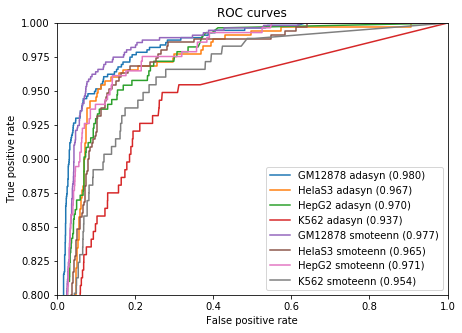

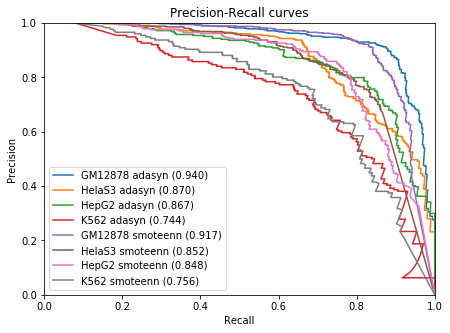

In [5]:
roc(results, 'AE-AP_2layers_150_roc.pdf')
pr(results, 'AE-AP_2layers_150_pr.pdf')

### Adasyn accuracy

In [6]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_adasyn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "AE","AP"])

print("Adasyn performance")
display(df)

Adasyn performance


Total        AE        AP
GM12878  0.949252  0.926391  0.955087
HelaS3   0.856860  0.962857  0.839779
HepG2    0.947816  0.841549  0.960921
K562     0.951231  0.670455  0.975719

### SMOTEENN accuracy

In [7]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_smoteenn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "AE","AP"])

print("Smoteenn performance")
display(df)

Smoteenn performance


Total        AE        AP
GM12878  0.933187  0.944345  0.930339
HelaS3   0.750991  0.985714  0.713168
HepG2    0.921917  0.926056  0.921407
K562     0.935734  0.823864  0.945491

## Benchmarks with the first MLP (4 layers (64, 128, 128, 64))

In [8]:
import matplotlib.pyplot as plt

history = [[] for i in range(4)]
y_pred_adasyn = [[] for i in range(4)]
y_pred_smoteenn = [[] for i in range(4)]
scores_adasyn = [[] for i in range(4)]
scores_smoteenn = [[] for i in range(4)]

inputs = [101, 74, 72, 135]
names = ["GM12878", "HelaS3", "HepG2", "K562"]

for i in range(4):
    model = dense2(inputs[i])
    history[i] = model.fit(X_train_adasyn[i], y_train_adasyn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_adasyn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_adasyn[i] = (total, one, zero)

for i in range(4):
    model = dense2(inputs[i])
    history[i] = model.fit(X_train_smoteenn[i], y_train_smoteenn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_smoteenn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_smoteenn[i] = (total, one, zero)
    
results_adasyn = [(names[i] + ' adasyn', y_test[i], y_pred_adasyn[i]) for i in range(4)]
results_smoteenn = [(names[i] + ' smoteenn', y_test[i], y_pred_smoteenn[i]) for i in range(4)]
results = results_adasyn + results_smoteenn

...building the mlp...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                6528      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)              

13778/13778 [==============================] - 0s 28us/step - loss: 0.1645 - acc: 0.9408 - auc_acc: 0.9643 - f1_acc: 0.9413 - precision_acc: 0.9201 - recall_acc: 0.9647 - val_loss: 0.2495 - val_acc: 0.9096 - val_auc_acc: 0.9645 - val_f1_acc: 0.8088 - val_precision_acc: 0.7210 - val_recall_acc: 0.9287
Epoch 49/150
13778/13778 [==============================] - 0s 30us/step - loss: 0.1636 - acc: 0.9407 - auc_acc: 0.9646 - f1_acc: 0.9414 - precision_acc: 0.9202 - recall_acc: 0.9646 - val_loss: 0.2451 - val_acc: 0.9092 - val_auc_acc: 0.9648 - val_f1_acc: 0.8063 - val_precision_acc: 0.7201 - val_recall_acc: 0.9228
Epoch 50/150
13778/13778 [==============================] - 0s 32us/step - loss: 0.1618 - acc: 0.9409 - auc_acc: 0.9650 - f1_acc: 0.9416 - precision_acc: 0.9207 - recall_acc: 0.9645 - val_loss: 0.2435 - val_acc: 0.9105 - val_auc_acc: 0.9651 - val_f1_acc: 0.8093 - val_precision_acc: 0.7216 - val_recall_acc: 0.9286
Epoch 51/150
13778/13778 [==============================] - 0s 29us/

13778/13778 [==============================] - 0s 32us/step - loss: 0.1037 - acc: 0.9655 - auc_acc: 0.9752 - f1_acc: 0.9658 - precision_acc: 0.9493 - recall_acc: 0.9834 - val_loss: 0.2638 - val_acc: 0.9210 - val_auc_acc: 0.9753 - val_f1_acc: 0.8231 - val_precision_acc: 0.7664 - val_recall_acc: 0.8941
Epoch 101/150
13778/13778 [==============================] - 0s 33us/step - loss: 0.1028 - acc: 0.9669 - auc_acc: 0.9754 - f1_acc: 0.9671 - precision_acc: 0.9507 - recall_acc: 0.9846 - val_loss: 0.2728 - val_acc: 0.9165 - val_auc_acc: 0.9754 - val_f1_acc: 0.8167 - val_precision_acc: 0.7477 - val_recall_acc: 0.9064
Epoch 102/150
13778/13778 [==============================] - 0s 34us/step - loss: 0.1060 - acc: 0.9641 - auc_acc: 0.9755 - f1_acc: 0.9645 - precision_acc: 0.9459 - recall_acc: 0.9845 - val_loss: 0.2684 - val_acc: 0.9174 - val_auc_acc: 0.9756 - val_f1_acc: 0.8183 - val_precision_acc: 0.7489 - val_recall_acc: 0.9082
Epoch 103/150
13778/13778 [==============================] - 0s 36

Epoch 126/150
13778/13778 [==============================] - 0s 27us/step - loss: 0.0884 - acc: 0.9718 - auc_acc: 0.9783 - f1_acc: 0.9718 - precision_acc: 0.9572 - recall_acc: 0.9872 - val_loss: 0.2816 - val_acc: 0.9197 - val_auc_acc: 0.9784 - val_f1_acc: 0.8211 - val_precision_acc: 0.7595 - val_recall_acc: 0.8998
Epoch 127/150
13778/13778 [==============================] - 0s 28us/step - loss: 0.0885 - acc: 0.9713 - auc_acc: 0.9784 - f1_acc: 0.9716 - precision_acc: 0.9558 - recall_acc: 0.9885 - val_loss: 0.2889 - val_acc: 0.9224 - val_auc_acc: 0.9785 - val_f1_acc: 0.8258 - val_precision_acc: 0.7727 - val_recall_acc: 0.8922
Epoch 128/150
13778/13778 [==============================] - 0s 25us/step - loss: 0.0869 - acc: 0.9726 - auc_acc: 0.9785 - f1_acc: 0.9730 - precision_acc: 0.9582 - recall_acc: 0.9887 - val_loss: 0.2955 - val_acc: 0.9206 - val_auc_acc: 0.9786 - val_f1_acc: 0.8219 - val_precision_acc: 0.7680 - val_recall_acc: 0.8898
Epoch 129/150
13778/13778 [=========================

Train on 13736 samples, validate on 2017 samples
Epoch 1/150
13736/13736 [==============================] - 1s 94us/step - loss: 1.3423 - acc: 0.6061 - auc_acc: 0.5647 - f1_acc: 0.5443 - precision_acc: 0.6103 - recall_acc: 0.5341 - val_loss: 0.9124 - val_acc: 0.2504 - val_auc_acc: 0.5970 - val_f1_acc: 0.2611 - val_precision_acc: 0.1520 - val_recall_acc: 0.9745
Epoch 2/150
13736/13736 [==============================] - 0s 26us/step - loss: 0.5915 - acc: 0.7140 - auc_acc: 0.6268 - f1_acc: 0.6929 - precision_acc: 0.7557 - recall_acc: 0.6651 - val_loss: 0.3946 - val_acc: 0.8989 - val_auc_acc: 0.6742 - val_f1_acc: 0.6751 - val_precision_acc: 0.6065 - val_recall_acc: 0.7859
Epoch 3/150
13736/13736 [==============================] - 0s 29us/step - loss: 0.5356 - acc: 0.7539 - auc_acc: 0.7041 - f1_acc: 0.7358 - precision_acc: 0.8078 - recall_acc: 0.7039 - val_loss: 0.4604 - val_acc: 0.8612 - val_auc_acc: 0.7288 - val_f1_acc: 0.6364 - val_precision_acc: 0.4955 - val_recall_acc: 0.9215
Epoch 4/1

Epoch 27/150
13736/13736 [==============================] - 0s 26us/step - loss: 0.3037 - acc: 0.8829 - auc_acc: 0.8944 - f1_acc: 0.8829 - precision_acc: 0.8924 - recall_acc: 0.8831 - val_loss: 0.2581 - val_acc: 0.9157 - val_auc_acc: 0.8955 - val_f1_acc: 0.7482 - val_precision_acc: 0.6294 - val_recall_acc: 0.9481
Epoch 28/150
13736/13736 [==============================] - 0s 26us/step - loss: 0.3143 - acc: 0.8767 - auc_acc: 0.8965 - f1_acc: 0.8758 - precision_acc: 0.8879 - recall_acc: 0.8751 - val_loss: 0.3624 - val_acc: 0.8478 - val_auc_acc: 0.8974 - val_f1_acc: 0.6275 - val_precision_acc: 0.4718 - val_recall_acc: 0.9647
Epoch 29/150
13736/13736 [==============================] - 0s 25us/step - loss: 0.3017 - acc: 0.8841 - auc_acc: 0.8983 - f1_acc: 0.8840 - precision_acc: 0.8901 - recall_acc: 0.8875 - val_loss: 0.2500 - val_acc: 0.9187 - val_auc_acc: 0.8994 - val_f1_acc: 0.7518 - val_precision_acc: 0.6382 - val_recall_acc: 0.9383
Epoch 30/150
13736/13736 [=============================

13736/13736 [==============================] - 0s 28us/step - loss: 0.2686 - acc: 0.9000 - auc_acc: 0.9240 - f1_acc: 0.9000 - precision_acc: 0.9034 - recall_acc: 0.9029 - val_loss: 0.2845 - val_acc: 0.8989 - val_auc_acc: 0.9244 - val_f1_acc: 0.7141 - val_precision_acc: 0.5780 - val_recall_acc: 0.9582
Epoch 54/150
13736/13736 [==============================] - 0s 31us/step - loss: 0.2672 - acc: 0.8999 - auc_acc: 0.9247 - f1_acc: 0.8988 - precision_acc: 0.9045 - recall_acc: 0.8993 - val_loss: 0.1647 - val_acc: 0.9430 - val_auc_acc: 0.9251 - val_f1_acc: 0.7969 - val_precision_acc: 0.7559 - val_recall_acc: 0.8616
Epoch 55/150
13736/13736 [==============================] - 0s 27us/step - loss: 0.2657 - acc: 0.9025 - auc_acc: 0.9255 - f1_acc: 0.9019 - precision_acc: 0.9073 - recall_acc: 0.9030 - val_loss: 0.2869 - val_acc: 0.9122 - val_auc_acc: 0.9258 - val_f1_acc: 0.7416 - val_precision_acc: 0.6157 - val_recall_acc: 0.9563
Epoch 56/150
13736/13736 [==============================] - 0s 29us/

13736/13736 [==============================] - 0s 28us/step - loss: 0.2315 - acc: 0.9126 - auc_acc: 0.9450 - f1_acc: 0.9131 - precision_acc: 0.9106 - recall_acc: 0.9209 - val_loss: 0.2559 - val_acc: 0.9088 - val_auc_acc: 0.9451 - val_f1_acc: 0.7319 - val_precision_acc: 0.6062 - val_recall_acc: 0.9458
Epoch 106/150
13736/13736 [==============================] - 0s 30us/step - loss: 0.2222 - acc: 0.9154 - auc_acc: 0.9452 - f1_acc: 0.9156 - precision_acc: 0.9127 - recall_acc: 0.9223 - val_loss: 0.2127 - val_acc: 0.9331 - val_auc_acc: 0.9453 - val_f1_acc: 0.7865 - val_precision_acc: 0.6904 - val_recall_acc: 0.9349
Epoch 107/150
13736/13736 [==============================] - 0s 28us/step - loss: 0.2187 - acc: 0.9182 - auc_acc: 0.9455 - f1_acc: 0.9178 - precision_acc: 0.9182 - recall_acc: 0.9208 - val_loss: 0.2732 - val_acc: 0.9162 - val_auc_acc: 0.9456 - val_f1_acc: 0.7532 - val_precision_acc: 0.6292 - val_recall_acc: 0.9593
Epoch 108/150
13736/13736 [==============================] - 0s 29

Epoch 131/150
13736/13736 [==============================] - 0s 30us/step - loss: 0.2019 - acc: 0.9244 - auc_acc: 0.9508 - f1_acc: 0.9244 - precision_acc: 0.9207 - recall_acc: 0.9305 - val_loss: 0.2442 - val_acc: 0.9122 - val_auc_acc: 0.9509 - val_f1_acc: 0.7432 - val_precision_acc: 0.6180 - val_recall_acc: 0.9568
Epoch 132/150
13736/13736 [==============================] - 0s 28us/step - loss: 0.2046 - acc: 0.9257 - auc_acc: 0.9510 - f1_acc: 0.9251 - precision_acc: 0.9266 - recall_acc: 0.9265 - val_loss: 0.2206 - val_acc: 0.9286 - val_auc_acc: 0.9510 - val_f1_acc: 0.7768 - val_precision_acc: 0.6691 - val_recall_acc: 0.9473
Epoch 133/150
13736/13736 [==============================] - 0s 27us/step - loss: 0.1998 - acc: 0.9255 - auc_acc: 0.9511 - f1_acc: 0.9255 - precision_acc: 0.9211 - recall_acc: 0.9323 - val_loss: 0.1748 - val_acc: 0.9395 - val_auc_acc: 0.9513 - val_f1_acc: 0.7962 - val_precision_acc: 0.7263 - val_recall_acc: 0.9011
Epoch 134/150
13736/13736 [=========================

14561/14561 [==============================] - 0s 30us/step - loss: 0.1954 - acc: 0.9269 - auc_acc: 0.9551 - f1_acc: 0.9287 - precision_acc: 0.8992 - recall_acc: 0.9613 - val_loss: 0.2023 - val_acc: 0.9203 - val_auc_acc: 0.9554 - val_f1_acc: 0.7099 - val_precision_acc: 0.5768 - val_recall_acc: 0.9377
Epoch 29/150
14561/14561 [==============================] - 0s 28us/step - loss: 0.1910 - acc: 0.9306 - auc_acc: 0.9557 - f1_acc: 0.9320 - precision_acc: 0.9051 - recall_acc: 0.9616 - val_loss: 0.2050 - val_acc: 0.9198 - val_auc_acc: 0.9561 - val_f1_acc: 0.7115 - val_precision_acc: 0.5747 - val_recall_acc: 0.9497
Epoch 30/150
14561/14561 [==============================] - 0s 29us/step - loss: 0.1924 - acc: 0.9293 - auc_acc: 0.9564 - f1_acc: 0.9313 - precision_acc: 0.9024 - recall_acc: 0.9632 - val_loss: 0.2044 - val_acc: 0.9174 - val_auc_acc: 0.9567 - val_f1_acc: 0.7023 - val_precision_acc: 0.5648 - val_recall_acc: 0.9409
Epoch 31/150
14561/14561 [==============================] - 0s 30us/

14561/14561 [==============================] - 0s 28us/step - loss: 0.1221 - acc: 0.9592 - auc_acc: 0.9728 - f1_acc: 0.9598 - precision_acc: 0.9373 - recall_acc: 0.9842 - val_loss: 0.1809 - val_acc: 0.9459 - val_auc_acc: 0.9729 - val_f1_acc: 0.7740 - val_precision_acc: 0.6919 - val_recall_acc: 0.8896
Epoch 81/150
14561/14561 [==============================] - 0s 28us/step - loss: 0.1211 - acc: 0.9589 - auc_acc: 0.9730 - f1_acc: 0.9593 - precision_acc: 0.9371 - recall_acc: 0.9832 - val_loss: 0.2001 - val_acc: 0.9348 - val_auc_acc: 0.9731 - val_f1_acc: 0.7410 - val_precision_acc: 0.6333 - val_recall_acc: 0.9042
Epoch 82/150
14561/14561 [==============================] - 0s 28us/step - loss: 0.1202 - acc: 0.9588 - auc_acc: 0.9732 - f1_acc: 0.9593 - precision_acc: 0.9367 - recall_acc: 0.9837 - val_loss: 0.1869 - val_acc: 0.9415 - val_auc_acc: 0.9733 - val_f1_acc: 0.7603 - val_precision_acc: 0.6636 - val_recall_acc: 0.9001
Epoch 83/150
14561/14561 [==============================] - 0s 27us/

14561/14561 [==============================] - 0s 29us/step - loss: 0.1025 - acc: 0.9658 - auc_acc: 0.9771 - f1_acc: 0.9660 - precision_acc: 0.9483 - recall_acc: 0.9848 - val_loss: 0.2053 - val_acc: 0.9410 - val_auc_acc: 0.9772 - val_f1_acc: 0.7624 - val_precision_acc: 0.6611 - val_recall_acc: 0.9118
Epoch 107/150
14561/14561 [==============================] - 0s 29us/step - loss: 0.1009 - acc: 0.9666 - auc_acc: 0.9772 - f1_acc: 0.9665 - precision_acc: 0.9486 - recall_acc: 0.9856 - val_loss: 0.1893 - val_acc: 0.9449 - val_auc_acc: 0.9773 - val_f1_acc: 0.7691 - val_precision_acc: 0.6843 - val_recall_acc: 0.8923
Epoch 108/150
14561/14561 [==============================] - 0s 29us/step - loss: 0.0973 - acc: 0.9681 - auc_acc: 0.9774 - f1_acc: 0.9683 - precision_acc: 0.9505 - recall_acc: 0.9873 - val_loss: 0.2026 - val_acc: 0.9435 - val_auc_acc: 0.9774 - val_f1_acc: 0.7636 - val_precision_acc: 0.6750 - val_recall_acc: 0.8913
Epoch 109/150
14561/14561 [==============================] - 0s 28

Epoch 132/150
14561/14561 [==============================] - 0s 28us/step - loss: 0.0892 - acc: 0.9694 - auc_acc: 0.9801 - f1_acc: 0.9694 - precision_acc: 0.9532 - recall_acc: 0.9867 - val_loss: 0.1914 - val_acc: 0.9507 - val_auc_acc: 0.9802 - val_f1_acc: 0.7837 - val_precision_acc: 0.7346 - val_recall_acc: 0.8584
Epoch 133/150
14561/14561 [==============================] - 0s 28us/step - loss: 0.0859 - acc: 0.9717 - auc_acc: 0.9803 - f1_acc: 0.9717 - precision_acc: 0.9570 - recall_acc: 0.9873 - val_loss: 0.1973 - val_acc: 0.9435 - val_auc_acc: 0.9803 - val_f1_acc: 0.7655 - val_precision_acc: 0.6846 - val_recall_acc: 0.8840
Epoch 134/150
14561/14561 [==============================] - 0s 29us/step - loss: 0.0856 - acc: 0.9723 - auc_acc: 0.9804 - f1_acc: 0.9723 - precision_acc: 0.9564 - recall_acc: 0.9893 - val_loss: 0.1929 - val_acc: 0.9488 - val_auc_acc: 0.9804 - val_f1_acc: 0.7793 - val_precision_acc: 0.7166 - val_recall_acc: 0.8714
Epoch 135/150
14561/14561 [=========================

12900/12900 [==============================] - 0s 31us/step - loss: 0.1875 - acc: 0.9339 - auc_acc: 0.9506 - f1_acc: 0.9345 - precision_acc: 0.9156 - recall_acc: 0.9552 - val_loss: 0.2517 - val_acc: 0.9009 - val_auc_acc: 0.9512 - val_f1_acc: 0.5872 - val_precision_acc: 0.4476 - val_recall_acc: 0.8858
Epoch 30/150
12900/12900 [==============================] - 0s 29us/step - loss: 0.1811 - acc: 0.9354 - auc_acc: 0.9516 - f1_acc: 0.9361 - precision_acc: 0.9181 - recall_acc: 0.9558 - val_loss: 0.2630 - val_acc: 0.8981 - val_auc_acc: 0.9520 - val_f1_acc: 0.5882 - val_precision_acc: 0.4430 - val_recall_acc: 0.9072
Epoch 31/150
12900/12900 [==============================] - 0s 30us/step - loss: 0.1775 - acc: 0.9380 - auc_acc: 0.9525 - f1_acc: 0.9390 - precision_acc: 0.9195 - recall_acc: 0.9601 - val_loss: 0.2678 - val_acc: 0.8941 - val_auc_acc: 0.9529 - val_f1_acc: 0.5758 - val_precision_acc: 0.4328 - val_recall_acc: 0.8991
Epoch 32/150
12900/12900 [==============================] - 0s 30us/

12900/12900 [==============================] - 0s 30us/step - loss: 0.0859 - acc: 0.9719 - auc_acc: 0.9753 - f1_acc: 0.9721 - precision_acc: 0.9566 - recall_acc: 0.9884 - val_loss: 0.2327 - val_acc: 0.9300 - val_auc_acc: 0.9754 - val_f1_acc: 0.6631 - val_precision_acc: 0.5505 - val_recall_acc: 0.8658
Epoch 82/150
12900/12900 [==============================] - 0s 29us/step - loss: 0.0896 - acc: 0.9707 - auc_acc: 0.9755 - f1_acc: 0.9710 - precision_acc: 0.9562 - recall_acc: 0.9868 - val_loss: 0.2455 - val_acc: 0.9243 - val_auc_acc: 0.9756 - val_f1_acc: 0.6484 - val_precision_acc: 0.5252 - val_recall_acc: 0.8792
Epoch 83/150
12900/12900 [==============================] - 0s 31us/step - loss: 0.0890 - acc: 0.9713 - auc_acc: 0.9758 - f1_acc: 0.9714 - precision_acc: 0.9563 - recall_acc: 0.9876 - val_loss: 0.2163 - val_acc: 0.9419 - val_auc_acc: 0.9759 - val_f1_acc: 0.7014 - val_precision_acc: 0.5989 - val_recall_acc: 0.8701
Epoch 84/150
12900/12900 [==============================] - 0s 31us/

12900/12900 [==============================] - 0s 30us/step - loss: 0.0678 - acc: 0.9784 - auc_acc: 0.9804 - f1_acc: 0.9785 - precision_acc: 0.9673 - recall_acc: 0.9903 - val_loss: 0.2391 - val_acc: 0.9413 - val_auc_acc: 0.9805 - val_f1_acc: 0.6962 - val_precision_acc: 0.6014 - val_recall_acc: 0.8566
Epoch 108/150
12900/12900 [==============================] - 0s 28us/step - loss: 0.0672 - acc: 0.9785 - auc_acc: 0.9806 - f1_acc: 0.9786 - precision_acc: 0.9676 - recall_acc: 0.9902 - val_loss: 0.2294 - val_acc: 0.9442 - val_auc_acc: 0.9806 - val_f1_acc: 0.7055 - val_precision_acc: 0.6182 - val_recall_acc: 0.8448
Epoch 109/150
12900/12900 [==============================] - 0s 29us/step - loss: 0.0649 - acc: 0.9787 - auc_acc: 0.9807 - f1_acc: 0.9788 - precision_acc: 0.9679 - recall_acc: 0.9903 - val_loss: 0.2220 - val_acc: 0.9453 - val_auc_acc: 0.9808 - val_f1_acc: 0.7053 - val_precision_acc: 0.6231 - val_recall_acc: 0.8387
Epoch 110/150
12900/12900 [==============================] - 0s 29

Epoch 133/150
12900/12900 [==============================] - 0s 30us/step - loss: 0.0542 - acc: 0.9818 - auc_acc: 0.9839 - f1_acc: 0.9819 - precision_acc: 0.9733 - recall_acc: 0.9910 - val_loss: 0.2561 - val_acc: 0.9442 - val_auc_acc: 0.9840 - val_f1_acc: 0.7053 - val_precision_acc: 0.6173 - val_recall_acc: 0.8467
Epoch 134/150
12900/12900 [==============================] - 0s 29us/step - loss: 0.0494 - acc: 0.9834 - auc_acc: 0.9841 - f1_acc: 0.9835 - precision_acc: 0.9755 - recall_acc: 0.9919 - val_loss: 0.2482 - val_acc: 0.9470 - val_auc_acc: 0.9841 - val_f1_acc: 0.7145 - val_precision_acc: 0.6253 - val_recall_acc: 0.8577
Epoch 135/150
12900/12900 [==============================] - 0s 29us/step - loss: 0.0506 - acc: 0.9822 - auc_acc: 0.9842 - f1_acc: 0.9823 - precision_acc: 0.9744 - recall_acc: 0.9906 - val_loss: 0.2548 - val_acc: 0.9499 - val_auc_acc: 0.9842 - val_f1_acc: 0.7258 - val_precision_acc: 0.6533 - val_recall_acc: 0.8435
Epoch 136/150
12900/12900 [=========================

12528/12528 [==============================] - 0s 31us/step - loss: 0.0661 - acc: 0.9780 - auc_acc: 0.9858 - f1_acc: 0.9795 - precision_acc: 0.9818 - recall_acc: 0.9776 - val_loss: 0.4125 - val_acc: 0.8996 - val_auc_acc: 0.9859 - val_f1_acc: 0.7879 - val_precision_acc: 0.7023 - val_recall_acc: 0.9054
Epoch 31/150
12528/12528 [==============================] - 0s 29us/step - loss: 0.0667 - acc: 0.9776 - auc_acc: 0.9860 - f1_acc: 0.9787 - precision_acc: 0.9820 - recall_acc: 0.9757 - val_loss: 0.4082 - val_acc: 0.9000 - val_auc_acc: 0.9861 - val_f1_acc: 0.7884 - val_precision_acc: 0.7039 - val_recall_acc: 0.9036
Epoch 32/150
12528/12528 [==============================] - 0s 26us/step - loss: 0.0624 - acc: 0.9779 - auc_acc: 0.9862 - f1_acc: 0.9791 - precision_acc: 0.9822 - recall_acc: 0.9764 - val_loss: 0.4201 - val_acc: 0.9000 - val_auc_acc: 0.9862 - val_f1_acc: 0.7884 - val_precision_acc: 0.7039 - val_recall_acc: 0.9036
Epoch 33/150
12528/12528 [==============================] - 0s 29us/

12528/12528 [==============================] - 0s 29us/step - loss: 0.0369 - acc: 0.9882 - auc_acc: 0.9895 - f1_acc: 0.9889 - precision_acc: 0.9887 - recall_acc: 0.9893 - val_loss: 0.4985 - val_acc: 0.9073 - val_auc_acc: 0.9895 - val_f1_acc: 0.8004 - val_precision_acc: 0.7212 - val_recall_acc: 0.9060
Epoch 83/150
12528/12528 [==============================] - 0s 30us/step - loss: 0.0384 - acc: 0.9867 - auc_acc: 0.9895 - f1_acc: 0.9876 - precision_acc: 0.9882 - recall_acc: 0.9872 - val_loss: 0.5010 - val_acc: 0.9060 - val_auc_acc: 0.9895 - val_f1_acc: 0.7987 - val_precision_acc: 0.7178 - val_recall_acc: 0.9080
Epoch 84/150
12528/12528 [==============================] - 0s 31us/step - loss: 0.0349 - acc: 0.9884 - auc_acc: 0.9895 - f1_acc: 0.9894 - precision_acc: 0.9885 - recall_acc: 0.9904 - val_loss: 0.5086 - val_acc: 0.9051 - val_auc_acc: 0.9895 - val_f1_acc: 0.7972 - val_precision_acc: 0.7141 - val_recall_acc: 0.9098
Epoch 85/150
12528/12528 [==============================] - 0s 29us/

12528/12528 [==============================] - 0s 30us/step - loss: 0.0287 - acc: 0.9899 - auc_acc: 0.9900 - f1_acc: 0.9904 - precision_acc: 0.9902 - recall_acc: 0.9909 - val_loss: 0.5321 - val_acc: 0.9087 - val_auc_acc: 0.9900 - val_f1_acc: 0.8028 - val_precision_acc: 0.7237 - val_recall_acc: 0.9080
Epoch 109/150
12528/12528 [==============================] - 0s 30us/step - loss: 0.0291 - acc: 0.9903 - auc_acc: 0.9900 - f1_acc: 0.9910 - precision_acc: 0.9898 - recall_acc: 0.9924 - val_loss: 0.5323 - val_acc: 0.9092 - val_auc_acc: 0.9900 - val_f1_acc: 0.8040 - val_precision_acc: 0.7254 - val_recall_acc: 0.9080
Epoch 110/150
12528/12528 [==============================] - 0s 29us/step - loss: 0.0273 - acc: 0.9903 - auc_acc: 0.9900 - f1_acc: 0.9909 - precision_acc: 0.9900 - recall_acc: 0.9919 - val_loss: 0.5527 - val_acc: 0.9078 - val_auc_acc: 0.9900 - val_f1_acc: 0.8013 - val_precision_acc: 0.7210 - val_recall_acc: 0.9077
Epoch 111/150
12528/12528 [==============================] - 0s 32

Epoch 134/150
12528/12528 [==============================] - 0s 30us/step - loss: 0.0246 - acc: 0.9915 - auc_acc: 0.9903 - f1_acc: 0.9921 - precision_acc: 0.9914 - recall_acc: 0.9928 - val_loss: 0.5863 - val_acc: 0.9115 - val_auc_acc: 0.9903 - val_f1_acc: 0.8069 - val_precision_acc: 0.7339 - val_recall_acc: 0.9021
Epoch 135/150
12528/12528 [==============================] - 0s 28us/step - loss: 0.0218 - acc: 0.9916 - auc_acc: 0.9903 - f1_acc: 0.9921 - precision_acc: 0.9912 - recall_acc: 0.9932 - val_loss: 0.6186 - val_acc: 0.9051 - val_auc_acc: 0.9903 - val_f1_acc: 0.7968 - val_precision_acc: 0.7144 - val_recall_acc: 0.9078
Epoch 136/150
12528/12528 [==============================] - 0s 31us/step - loss: 0.0194 - acc: 0.9939 - auc_acc: 0.9903 - f1_acc: 0.9944 - precision_acc: 0.9937 - recall_acc: 0.9951 - val_loss: 0.6106 - val_acc: 0.9096 - val_auc_acc: 0.9903 - val_f1_acc: 0.8042 - val_precision_acc: 0.7270 - val_recall_acc: 0.9063
Epoch 137/150
12528/12528 [=========================

12331/12331 [==============================] - 0s 28us/step - loss: 0.1884 - acc: 0.9317 - auc_acc: 0.9571 - f1_acc: 0.9347 - precision_acc: 0.9667 - recall_acc: 0.9092 - val_loss: 0.4226 - val_acc: 0.8815 - val_auc_acc: 0.9574 - val_f1_acc: 0.6840 - val_precision_acc: 0.5382 - val_recall_acc: 0.9656
Epoch 32/150
12331/12331 [==============================] - 0s 28us/step - loss: 0.1692 - acc: 0.9376 - auc_acc: 0.9577 - f1_acc: 0.9416 - precision_acc: 0.9641 - recall_acc: 0.9235 - val_loss: 0.2676 - val_acc: 0.9365 - val_auc_acc: 0.9581 - val_f1_acc: 0.7829 - val_precision_acc: 0.7239 - val_recall_acc: 0.8682
Epoch 33/150
12331/12331 [==============================] - 0s 30us/step - loss: 0.1553 - acc: 0.9456 - auc_acc: 0.9586 - f1_acc: 0.9491 - precision_acc: 0.9700 - recall_acc: 0.9312 - val_loss: 0.3663 - val_acc: 0.9217 - val_auc_acc: 0.9590 - val_f1_acc: 0.7614 - val_precision_acc: 0.6439 - val_recall_acc: 0.9528
Epoch 34/150
12331/12331 [==============================] - 0s 29us/

12331/12331 [==============================] - 0s 29us/step - loss: 0.1324 - acc: 0.9530 - auc_acc: 0.9746 - f1_acc: 0.9560 - precision_acc: 0.9706 - recall_acc: 0.9440 - val_loss: 0.3486 - val_acc: 0.9291 - val_auc_acc: 0.9747 - val_f1_acc: 0.7761 - val_precision_acc: 0.6714 - val_recall_acc: 0.9356
Epoch 84/150
12331/12331 [==============================] - 0s 29us/step - loss: 0.1219 - acc: 0.9581 - auc_acc: 0.9748 - f1_acc: 0.9607 - precision_acc: 0.9732 - recall_acc: 0.9501 - val_loss: 0.4264 - val_acc: 0.8979 - val_auc_acc: 0.9748 - val_f1_acc: 0.7130 - val_precision_acc: 0.5716 - val_recall_acc: 0.9701
Epoch 85/150
12331/12331 [==============================] - 0s 30us/step - loss: 0.1166 - acc: 0.9595 - auc_acc: 0.9749 - f1_acc: 0.9622 - precision_acc: 0.9719 - recall_acc: 0.9537 - val_loss: 0.3040 - val_acc: 0.9346 - val_auc_acc: 0.9750 - val_f1_acc: 0.7874 - val_precision_acc: 0.6934 - val_recall_acc: 0.9260
Epoch 86/150
12331/12331 [==============================] - 0s 30us/

12331/12331 [==============================] - 0s 30us/step - loss: 0.1264 - acc: 0.9529 - auc_acc: 0.9773 - f1_acc: 0.9559 - precision_acc: 0.9686 - recall_acc: 0.9461 - val_loss: 0.2769 - val_acc: 0.9425 - val_auc_acc: 0.9774 - val_f1_acc: 0.8038 - val_precision_acc: 0.7361 - val_recall_acc: 0.8975
Epoch 110/150
12331/12331 [==============================] - 0s 31us/step - loss: 0.1094 - acc: 0.9589 - auc_acc: 0.9774 - f1_acc: 0.9616 - precision_acc: 0.9745 - recall_acc: 0.9502 - val_loss: 0.4796 - val_acc: 0.8542 - val_auc_acc: 0.9775 - val_f1_acc: 0.6398 - val_precision_acc: 0.4818 - val_recall_acc: 0.9765
Epoch 111/150
12331/12331 [==============================] - 0s 28us/step - loss: 0.1183 - acc: 0.9574 - auc_acc: 0.9775 - f1_acc: 0.9605 - precision_acc: 0.9727 - recall_acc: 0.9496 - val_loss: 1.7960 - val_acc: 0.6093 - val_auc_acc: 0.9774 - val_f1_acc: 0.4061 - val_precision_acc: 0.2591 - val_recall_acc: 0.9859
Epoch 112/150
12331/12331 [==============================] - 0s 30

Epoch 135/150
12331/12331 [==============================] - 0s 29us/step - loss: 0.1027 - acc: 0.9615 - auc_acc: 0.9791 - f1_acc: 0.9638 - precision_acc: 0.9770 - recall_acc: 0.9518 - val_loss: 0.4758 - val_acc: 0.8880 - val_auc_acc: 0.9791 - val_f1_acc: 0.6948 - val_precision_acc: 0.5511 - val_recall_acc: 0.9668
Epoch 136/150
12331/12331 [==============================] - 0s 28us/step - loss: 0.1007 - acc: 0.9643 - auc_acc: 0.9791 - f1_acc: 0.9667 - precision_acc: 0.9754 - recall_acc: 0.9592 - val_loss: 0.2815 - val_acc: 0.9460 - val_auc_acc: 0.9792 - val_f1_acc: 0.8144 - val_precision_acc: 0.7501 - val_recall_acc: 0.9031
Epoch 137/150
12331/12331 [==============================] - 0s 30us/step - loss: 0.1104 - acc: 0.9607 - auc_acc: 0.9792 - f1_acc: 0.9634 - precision_acc: 0.9719 - recall_acc: 0.9562 - val_loss: 0.3351 - val_acc: 0.9360 - val_auc_acc: 0.9793 - val_f1_acc: 0.7894 - val_precision_acc: 0.6985 - val_recall_acc: 0.9264
Epoch 138/150
12331/12331 [=========================

13499/13499 [==============================] - 0s 30us/step - loss: 0.0898 - acc: 0.9678 - auc_acc: 0.9836 - f1_acc: 0.9702 - precision_acc: 0.9687 - recall_acc: 0.9722 - val_loss: 0.3224 - val_acc: 0.9111 - val_auc_acc: 0.9837 - val_f1_acc: 0.6824 - val_precision_acc: 0.5450 - val_recall_acc: 0.9234
Epoch 33/150
13499/13499 [==============================] - 0s 30us/step - loss: 0.0886 - acc: 0.9667 - auc_acc: 0.9838 - f1_acc: 0.9690 - precision_acc: 0.9672 - recall_acc: 0.9711 - val_loss: 0.3636 - val_acc: 0.9000 - val_auc_acc: 0.9839 - val_f1_acc: 0.6588 - val_precision_acc: 0.5123 - val_recall_acc: 0.9367
Epoch 34/150
13499/13499 [==============================] - 0s 30us/step - loss: 0.0904 - acc: 0.9665 - auc_acc: 0.9840 - f1_acc: 0.9689 - precision_acc: 0.9678 - recall_acc: 0.9704 - val_loss: 0.3540 - val_acc: 0.9038 - val_auc_acc: 0.9841 - val_f1_acc: 0.6646 - val_precision_acc: 0.5222 - val_recall_acc: 0.9271
Epoch 35/150
13499/13499 [==============================] - 0s 30us/

13499/13499 [==============================] - 0s 29us/step - loss: 0.0441 - acc: 0.9855 - auc_acc: 0.9895 - f1_acc: 0.9866 - precision_acc: 0.9827 - recall_acc: 0.9907 - val_loss: 0.3590 - val_acc: 0.9188 - val_auc_acc: 0.9895 - val_f1_acc: 0.6986 - val_precision_acc: 0.5687 - val_recall_acc: 0.9157
Epoch 85/150
13499/13499 [==============================] - 0s 27us/step - loss: 0.0479 - acc: 0.9829 - auc_acc: 0.9896 - f1_acc: 0.9841 - precision_acc: 0.9821 - recall_acc: 0.9864 - val_loss: 0.3695 - val_acc: 0.9164 - val_auc_acc: 0.9896 - val_f1_acc: 0.6936 - val_precision_acc: 0.5605 - val_recall_acc: 0.9209
Epoch 86/150
13499/13499 [==============================] - 0s 29us/step - loss: 0.0467 - acc: 0.9836 - auc_acc: 0.9896 - f1_acc: 0.9848 - precision_acc: 0.9811 - recall_acc: 0.9888 - val_loss: 0.3639 - val_acc: 0.9174 - val_auc_acc: 0.9897 - val_f1_acc: 0.6962 - val_precision_acc: 0.5658 - val_recall_acc: 0.9159
Epoch 87/150
13499/13499 [==============================] - 0s 29us/

13499/13499 [==============================] - 0s 30us/step - loss: 0.0361 - acc: 0.9874 - auc_acc: 0.9907 - f1_acc: 0.9883 - precision_acc: 0.9851 - recall_acc: 0.9916 - val_loss: 0.4096 - val_acc: 0.9145 - val_auc_acc: 0.9907 - val_f1_acc: 0.6895 - val_precision_acc: 0.5565 - val_recall_acc: 0.9174
Epoch 111/150
13499/13499 [==============================] - 0s 34us/step - loss: 0.0368 - acc: 0.9866 - auc_acc: 0.9907 - f1_acc: 0.9876 - precision_acc: 0.9847 - recall_acc: 0.9907 - val_loss: 0.3593 - val_acc: 0.9256 - val_auc_acc: 0.9908 - val_f1_acc: 0.7173 - val_precision_acc: 0.5986 - val_recall_acc: 0.9042
Epoch 112/150
13499/13499 [==============================] - 0s 31us/step - loss: 0.0371 - acc: 0.9874 - auc_acc: 0.9908 - f1_acc: 0.9882 - precision_acc: 0.9865 - recall_acc: 0.9900 - val_loss: 0.3853 - val_acc: 0.9227 - val_auc_acc: 0.9908 - val_f1_acc: 0.7103 - val_precision_acc: 0.5839 - val_recall_acc: 0.9157
Epoch 113/150
13499/13499 [==============================] - 0s 32

Epoch 136/150
13499/13499 [==============================] - 0s 29us/step - loss: 0.0285 - acc: 0.9906 - auc_acc: 0.9915 - f1_acc: 0.9913 - precision_acc: 0.9889 - recall_acc: 0.9938 - val_loss: 0.4035 - val_acc: 0.9246 - val_auc_acc: 0.9916 - val_f1_acc: 0.7173 - val_precision_acc: 0.5970 - val_recall_acc: 0.9096
Epoch 137/150
13499/13499 [==============================] - 0s 28us/step - loss: 0.0314 - acc: 0.9897 - auc_acc: 0.9916 - f1_acc: 0.9905 - precision_acc: 0.9879 - recall_acc: 0.9932 - val_loss: 0.4057 - val_acc: 0.9212 - val_auc_acc: 0.9916 - val_f1_acc: 0.7075 - val_precision_acc: 0.5817 - val_recall_acc: 0.9130
Epoch 138/150
13499/13499 [==============================] - 0s 30us/step - loss: 0.0299 - acc: 0.9900 - auc_acc: 0.9916 - f1_acc: 0.9908 - precision_acc: 0.9889 - recall_acc: 0.9929 - val_loss: 0.4160 - val_acc: 0.9203 - val_auc_acc: 0.9916 - val_f1_acc: 0.7022 - val_precision_acc: 0.5744 - val_recall_acc: 0.9130
Epoch 139/150
13499/13499 [=========================

11745/11745 [==============================] - 0s 29us/step - loss: 0.1046 - acc: 0.9646 - auc_acc: 0.9746 - f1_acc: 0.9675 - precision_acc: 0.9671 - recall_acc: 0.9683 - val_loss: 0.3886 - val_acc: 0.8981 - val_auc_acc: 0.9748 - val_f1_acc: 0.5957 - val_precision_acc: 0.4478 - val_recall_acc: 0.9280
Epoch 34/150
11745/11745 [==============================] - 0s 30us/step - loss: 0.1005 - acc: 0.9653 - auc_acc: 0.9750 - f1_acc: 0.9682 - precision_acc: 0.9693 - recall_acc: 0.9676 - val_loss: 0.4191 - val_acc: 0.8901 - val_auc_acc: 0.9752 - val_f1_acc: 0.5759 - val_precision_acc: 0.4269 - val_recall_acc: 0.9219
Epoch 35/150
11745/11745 [==============================] - 0s 31us/step - loss: 0.0992 - acc: 0.9632 - auc_acc: 0.9754 - f1_acc: 0.9664 - precision_acc: 0.9671 - recall_acc: 0.9662 - val_loss: 0.4118 - val_acc: 0.8918 - val_auc_acc: 0.9756 - val_f1_acc: 0.5799 - val_precision_acc: 0.4314 - val_recall_acc: 0.9219
Epoch 36/150
11745/11745 [==============================] - 0s 29us/

11745/11745 [==============================] - 0s 32us/step - loss: 0.0427 - acc: 0.9855 - auc_acc: 0.9860 - f1_acc: 0.9868 - precision_acc: 0.9831 - recall_acc: 0.9906 - val_loss: 0.4157 - val_acc: 0.9140 - val_auc_acc: 0.9860 - val_f1_acc: 0.6256 - val_precision_acc: 0.4877 - val_recall_acc: 0.9012
Epoch 86/150
11745/11745 [==============================] - 0s 32us/step - loss: 0.0400 - acc: 0.9857 - auc_acc: 0.9861 - f1_acc: 0.9869 - precision_acc: 0.9838 - recall_acc: 0.9902 - val_loss: 0.4230 - val_acc: 0.9140 - val_auc_acc: 0.9861 - val_f1_acc: 0.6237 - val_precision_acc: 0.4887 - val_recall_acc: 0.8920
Epoch 87/150
11745/11745 [==============================] - 0s 32us/step - loss: 0.0441 - acc: 0.9860 - auc_acc: 0.9862 - f1_acc: 0.9871 - precision_acc: 0.9842 - recall_acc: 0.9903 - val_loss: 0.4144 - val_acc: 0.9117 - val_auc_acc: 0.9862 - val_f1_acc: 0.6173 - val_precision_acc: 0.4788 - val_recall_acc: 0.8920
Epoch 88/150
11745/11745 [==============================] - 0s 28us/

11745/11745 [==============================] - 0s 30us/step - loss: 0.0343 - acc: 0.9894 - auc_acc: 0.9882 - f1_acc: 0.9903 - precision_acc: 0.9875 - recall_acc: 0.9934 - val_loss: 0.4673 - val_acc: 0.9151 - val_auc_acc: 0.9882 - val_f1_acc: 0.6297 - val_precision_acc: 0.4923 - val_recall_acc: 0.9012
Epoch 112/150
11745/11745 [==============================] - 0s 30us/step - loss: 0.0305 - acc: 0.9905 - auc_acc: 0.9883 - f1_acc: 0.9916 - precision_acc: 0.9889 - recall_acc: 0.9945 - val_loss: 0.4502 - val_acc: 0.9163 - val_auc_acc: 0.9883 - val_f1_acc: 0.6315 - val_precision_acc: 0.4970 - val_recall_acc: 0.8939
Epoch 113/150
11745/11745 [==============================] - 0s 31us/step - loss: 0.0312 - acc: 0.9896 - auc_acc: 0.9883 - f1_acc: 0.9904 - precision_acc: 0.9878 - recall_acc: 0.9931 - val_loss: 0.4566 - val_acc: 0.9157 - val_auc_acc: 0.9884 - val_f1_acc: 0.6275 - val_precision_acc: 0.4918 - val_recall_acc: 0.8920
Epoch 114/150
11745/11745 [==============================] - 0s 31

Epoch 137/150
11745/11745 [==============================] - 0s 30us/step - loss: 0.0241 - acc: 0.9917 - auc_acc: 0.9895 - f1_acc: 0.9924 - precision_acc: 0.9903 - recall_acc: 0.9947 - val_loss: 0.4690 - val_acc: 0.9191 - val_auc_acc: 0.9896 - val_f1_acc: 0.6393 - val_precision_acc: 0.5110 - val_recall_acc: 0.8920
Epoch 138/150
11745/11745 [==============================] - 0s 30us/step - loss: 0.0261 - acc: 0.9913 - auc_acc: 0.9896 - f1_acc: 0.9921 - precision_acc: 0.9904 - recall_acc: 0.9939 - val_loss: 0.4739 - val_acc: 0.9191 - val_auc_acc: 0.9896 - val_f1_acc: 0.6367 - val_precision_acc: 0.5067 - val_recall_acc: 0.8848
Epoch 139/150
11745/11745 [==============================] - 0s 25us/step - loss: 0.0245 - acc: 0.9915 - auc_acc: 0.9896 - f1_acc: 0.9921 - precision_acc: 0.9903 - recall_acc: 0.9941 - val_loss: 0.4571 - val_acc: 0.9214 - val_auc_acc: 0.9896 - val_f1_acc: 0.6427 - val_precision_acc: 0.5152 - val_recall_acc: 0.8848
Epoch 140/150
11745/11745 [=========================

### ROC and PR curves

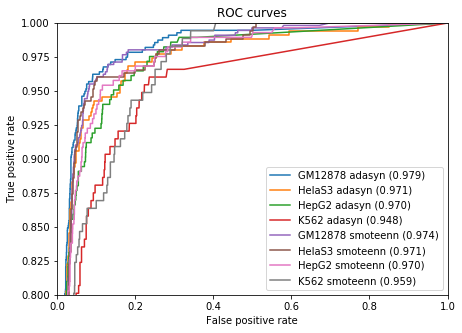

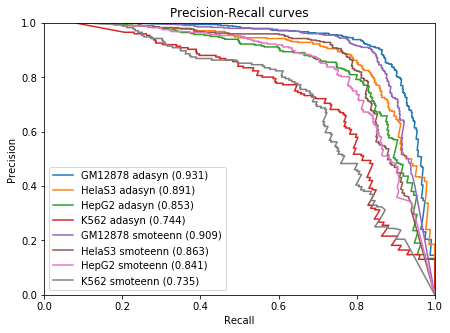

In [9]:
roc(results, 'AE-AP_4layers_150_roc.pdf')
pr(results, 'AE-AP_4layers_150_pr.pdf')

### Adasyn accuracy

In [10]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_adasyn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-E","A-P"])

print("Adasyn performance")
display(df)

Adasyn performance


Total       A-E       A-P
GM12878  0.937203  0.946140  0.934922
HelaS3   0.941713  0.905714  0.947514
HepG2    0.941245  0.876761  0.949197
K562     0.949863  0.732955  0.968781

### SMOTEENN accuracy

In [11]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_smoteenn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-E","A-P"])

print("Smoteenn performance")
display(df)

Smoteenn performance


Total       A-E       A-P
GM12878  0.932092  0.944345  0.928964
HelaS3   0.929025  0.940000  0.927256
HepG2    0.909548  0.929577  0.907078
K562     0.930264  0.846591  0.937562